In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!gdown --id 1vxcB-cLeky4JA8j6KUjJkNOX2wKR-c_f

Downloading...
From: https://drive.google.com/uc?id=1vxcB-cLeky4JA8j6KUjJkNOX2wKR-c_f
To: /content/Cardiotocography.csv
5.35MB [00:00, 47.0MB/s]


In [70]:
!pip install hyperopt

In [ ]:
!pip install umap-learn

     |████████████████████████████████| 80 kB 5.3 MB/s 
     |████████████████████████████████| 1.1 MB 20.0 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=cc9cbb75333447d0c6310753d3b23abd7df660202b70b7d748c053fac2488694
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.4-py3-none-any.whl size=52373 sha256=090b3b8a6967717bab082aff72342ee16bb06fe45b5681909f648c2cb2ad15d1
  Stored in directory: /root/.cache/pip/wheels/d0/5b/62/3401692ddad12324249c774c4b15ccb046946021e2b581c043
Successfully built umap-learn pynndescent


In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 34.6 MB 639 kB/s
     |████████████████████████████████| 10.1 MB 5.0 MB/s 
     |████████████████████████████████| 636 kB 56.6 MB/s 
     |████████████████████████████████| 102 kB 32.2 MB/s 
     |████████████████████████████████| 675 kB 59.4 MB/s 
     |████████████████████████████████| 3.1 MB 68.3 MB/s 
     |████████████████████████████████| 62 kB 747 kB/s 
     |████████████████████████████████| 812 kB 36.8 MB/s 
     |████████████████████████████████| 28.5 MB 1.8 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248524 sha256=ecd8cc94ea85e46038f4bd7d934b8ce1a52bb86512c18408d129ae2d3ccf9b8e
  Stored in directory: /tmp/pip-ephem-wheel-cache-hqemqya7/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=d5e8f9cb801bce5a97c05e233f2312307aa256bee93983c7709970c33a6e0ca0
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14

In [2]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
import itertools
from itertools import cycle
from scipy import interp


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from tqdm.notebook import tqdm as tqdm

from sklearn.metrics import classification_report

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
 
import warnings
warnings.filterwarnings('ignore')

In [4]:
%matplotlib inline

In [9]:
import umap

In [5]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score, precision_recall_curve

In [6]:
from scipy.spatial.distance import mahalanobis, pdist, squareform
from scipy.stats import chi2

In [7]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [71]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from functools import partial

Task: 
1. EDA/ data preparation - 2
2. Feature engineering (non-linear transformations) - 2
3. Mahalanobis rule - 1
4. Supervised models  
    4.1. SVM - 1  
    4.2. Logreg - 1  
    4.3. KNN - 1  
5. Unsupervised models (with tuning hyperparams):  
    5.1. One-class SVM - 2  
    5.2. Isolation Forest - 2  
6. Choose metrics and explain the choice. Compare different models and select the best (separately for supervised and unsupervised approaches) - 2  
7. General points:  
    6.1. Code quality (no duplicated blocks, readable variables, ) - 1  
    6.2. Visualization - 1  
    6.3. Analysis and comments – 2 


# Support

In [8]:
def objective_isof(space, estimator, x_train, y_train):

    params = {
        'n_estimators': int(space['n_estimators']),
        'max_samples': space['max_samples'],
        'contamination': space['contamination'],
    }
    
    # задаём модели требуемые параметры    
    estimator.set_params(**params)

    estimator.fit(x_train)
    predictions = estimator.predict(x_train)
    predictions[predictions != -1] = 0
    predictions[predictions == -1] = 1
    
    score = fbeta_score(y_train["outlier"], predictions, beta=2)
    print("fbeta_score {:.3f} params {}".format(score, params))
    return {'loss':1 - score, 'status': STATUS_OK }

In [77]:
def objective_svc(space, estimator, x_train, y_train):

    params = {
        'nu': space['nu'],
        'gamma': space['gamma'],
    }
    
    # задаём модели требуемые параметры    
    estimator.set_params(**params)

    estimator.fit(x_train)
    predictions = estimator.predict(x_train)
    predictions[predictions != -1] = 0
    predictions[predictions == -1] = 1
    
    score = fbeta_score(y_train["outlier"], predictions, beta=2)
    print("fbeta_score {:.3f} params {}".format(score, params))
    return {'loss':1 - score, 'status': STATUS_OK }

In [9]:
def plot_results(y_data, x_reduced, hue_label, model_name):
    sns.set(style="white")
    data = pd.concat([x_reduced, y_data], axis=1)
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.scatterplot(x=0, y=1, data=data, hue="outlier", ax=axes[0])
    sns.scatterplot(x=0, y=1, data=data, hue=hue_label, ax=axes[1])
    axes[0].set_title("Real")
    axes[1].set_title(model_name + "results")
    plt.show()

In [10]:
def report(y_data, predictions, outlier_label =-1):
    predictions = predictions.copy()

    predictions[predictions != outlier_label] = 0
    predictions[predictions == outlier_label] = 1

    print("f2_score:", fbeta_score(y_data, predictions, beta=2))

    print(classification_report(y_data, predictions))

In [11]:
def func_roc_auc(proba, y):
    sns.set(style="whitegrid", palette='Dark2')
    
    auc = roc_auc_score(np.array(y), proba)
    print(f'ROC-AUC: {auc:.3}')
    
    fpr, tpr, _ = roc_curve(y, proba)
    
    fig, axes = plt.subplots(1, 2, figsize = (17,5))
    axes[0].plot(fpr, tpr, label = 'best_estimator')
    axes[0].plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')
    axes[0].set_xlim([-0.05, 1.05])
    axes[0].set_ylim([-0.05, 1.05])
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].set_title('ROC curve')
    axes[0].legend(loc = "lower right")

    precision, recall, thresholds = precision_recall_curve(y, proba) 
    axes[1].set_title("Precision-Recall vs Threshold Chart")
    axes[1].plot(thresholds, precision[: -1], "b--", label="Precision")
    axes[1].plot(thresholds, recall[: -1], "r--", label="Recall")
    axes[1].set_ylabel("Precision, Recall")
    axes[1].set_xlabel("Threshold")
    axes[1].set_ylim([0,1])
    axes[1].legend(loc="lower left")
    plt.show()

In [12]:
def matthews_cc(contingency_table):
    
    a_1 = contingency_table.iloc[0,0]
    b_2 = contingency_table.iloc[0,1]
    c_3 = contingency_table.iloc[1,0]
    d_4 = contingency_table.iloc[1,1]
    n = contingency_table.sum().sum()
    
    if n <= 40:
        return print('not enough observations')    
    
    con_1 = ((a_1 + c_3) * (a_1 + b_2)) / n
    con_2 = ((a_1 + c_3) * (c_3 + d_4)) / n
    con_3 = ((b_2 + d_4) * (a_1 + b_2)) / n
    con_4 = ((b_2 + d_4) * (c_3 + d_4)) / n
    
    if (con_1 or con_2 or con_3 or con_4) < 5:
        return print('wrong density of distribution')
    
    MCC = (a_1 * d_4 - b_2 * c_3) / (np.sqrt((a_1 + b_2) * (a_1 + c_3) * (b_2 + d_4) * (c_3 + d_4)))
    return MCC

In [13]:
def plot_func(data, column_x, column_y, figsize=None):
    counts = []
    for i in np.sort(data[column_x].unique()):
        counts.append(len(data.loc[data[column_x]==i]))

    sns.set(font_scale=1.2, style="whitegrid")  
    if figsize is not None:
        fig = plt.figure(figsize=figsize)
    else:
        fig = plt.figure(figsize=(12,5))
    ax = sns.countplot(x=column_x, data=data.loc[:, [column_x, column_y]], hue=column_y)
    z = 0
    for i, p in enumerate(ax.patches):
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate(f'{100.*y/counts[z]:.1f}%\n ({y} obs)', (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
        z += 1
        if z == len(counts):
            z = 0

    plt.xlabel("categories")
    plt.ylabel("objects")
    plt.title("Distribution of " + column_x + " feature")
    plt.tick_params(axis='x', labelrotation=0)
    plt.tight_layout()
    plt.legend(loc="best")
    plt.show()

In [14]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
        Giving a value between 0 and +1 
    """
    chi2, pvalue = stats.chi2_contingency(confusion_matrix)[:2]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    result = np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
    print(f"Cramers V: {round(result, 3)}, p-value: {pvalue:0.03}")
    return result, pvalue

In [15]:
def distribution_plot(data, target_col):
    sns.set(style="white", palette="brg_r")
    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    #histogram and normal probability plot
    sns.distplot(data.loc[:, target_col], fit=norm, ax=axes[0]);
    res = stats.probplot(data.loc[:, target_col], plot=axes[1])
    plt.tight_layout()
    plt.show()

    #skewness and kurtosis
    print("Skewness: %f" % data.loc[:, target_col].skew())
    print("Kurtosis: %f" % data.loc[:, target_col].kurt(), "\n")

    k2, p = stats.normaltest(data.loc[:, target_col])
    print("null hypothesis: x comes from a normal distribution")
    print(f"p_value = {p}, {k2}")

def dist_graph(data, target_col):
    sns.set(style="white", palette="brg_r")
    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    #histogram and normal probability plot
    sns.distplot(data.loc[:, target_col], fit=norm, ax=axes[0]);
    res = stats.probplot(data.loc[:, target_col], plot=axes[1])
    plt.tight_layout()
    plt.show()

    #skewness and kurtosis
    print("Skewness: %f" % data.loc[:, target_col].skew())
    print("Kurtosis: %f" % data.loc[:, target_col].kurt(), "\n")

    k2, p = stats.normaltest(data.loc[:, target_col])
    alpha = 1e-3
    print("null hypothesis: x comes from a normal distribution")
    print(f"p_value = {p}, {k2}")
    if p < alpha:  # 
        print("The null hypothesis can be rejected")
        print("Oops, We shoukd try to transform the distribution!")
    else:
        print("The null hypothesis cannot be rejected")
        return data.loc[:, target_col], 1

    if p < alpha:
        data.loc[:, target_col+'_box'], lmbda = stats.boxcox(data.loc[:, target_col])
        fig, axes = plt.subplots(1, 2, figsize=(15,5))
        sns.distplot(data.loc[:, target_col+'_box'], fit=norm, ax=axes[0]);
        res = stats.probplot(data.loc[:, target_col+'_box'], plot=axes[1])
        plt.tight_layout()
        plt.show()

        #skewness and kurtosis
        print("Skewness: %f" % data.loc[:, target_col+'_box'].skew())
        print("Kurtosis: %f" % data.loc[:, target_col+'_box'].kurt(), "\n")

        k2, p = stats.normaltest(data.loc[:, target_col+'_box'])
        alpha = 1e-3
        print("null hypothesis: x comes from a normal distribution")
        print(f"p_value = {p}, {k2}")
        if p < alpha:  # 
            print("The null hypothesis still can be rejected")
            print("But we did our best")
        else:
            print("The null hypothesis cannot be rejected now")
    return data.loc[:, target_col+'_box'], lmbda

In [16]:
def hist_hue(data, target_hue_list):
    mean_1 = data.loc[data["outlier"]==1, target_hue_list[0]].median()
    mean_2 = data.loc[data["outlier"]==0, target_hue_list[0]].median()
    fig, ax1 = plt.subplots(figsize=(12,5))
    sns.set(style="white")
    #histogram and normal probability plot
    sns.histplot(x=target_hue_list[0], data=data.loc[:, target_hue_list], hue=target_hue_list[1])
    ax1.axvline(x=mean_1, color="r", linewidth=4, label="Outlier")
    ax1.axvline(x=mean_2, color="b", linewidth=4, label="Non-Outlier")
    ax2 = ax1.twinx()
    sns.kdeplot(x=target_hue_list[0], data=data.loc[:, target_hue_list], hue=target_hue_list[1])
    plt.tight_layout()
    ax1.legend(loc="upper left")
    plt.show()

In [17]:
def target_distr(data, target):
    ncount = len(data)

    fig = plt.figure(figsize=(12,5))
    ax = sns.countplot(x=target, data=data.loc[:, [target]])

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate(f'{100.*y/ncount:.1f}% ({int(y)} obs)', (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

    plt.xlabel("categories")
    plt.ylabel("objects")
    plt.title('Distribution of Classes')
    plt.show()

# EDA & FE

In [18]:
data = pd.read_csv("/content/Cardiotocography.csv")
data.drop(columns=["id"], inplace=True)

In [ ]:
profile = ProfileReport(data, title="Pandas Profiling Report")

In [ ]:
profile

Output hidden; open in https://colab.research.google.com to view.

## Target variable analysis

In [19]:
data.loc[data["outlier"]=="b'no'", "outlier"] = 0
data.loc[data["outlier"]=="b'yes'", "outlier"] = 1

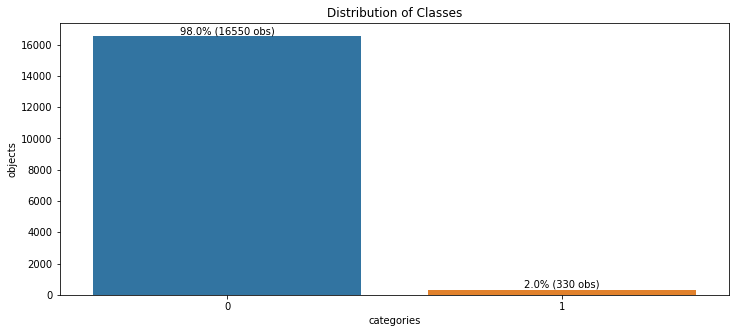

In [22]:
target_distr(data, "outlier")

## Univariate analysis

In [20]:
extra = []

### Numerical Features

#### AC

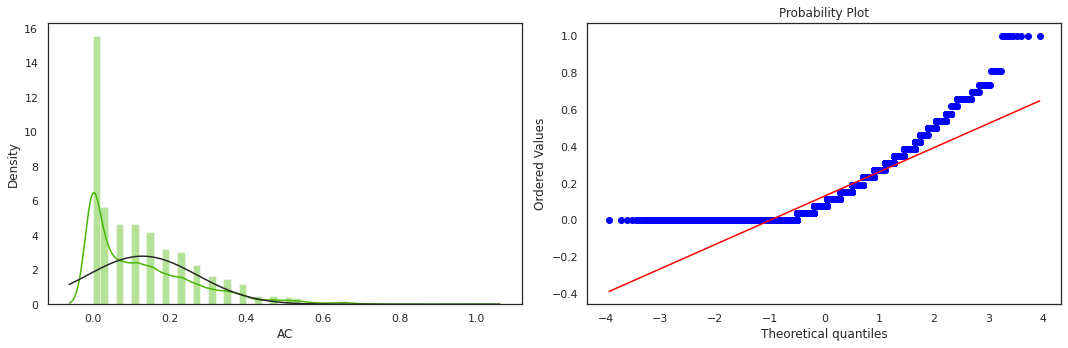

Skewness: 1.397589
Kurtosis: 2.257366 

null hypothesis: x comes from a normal distribution
p_value = 0.0, 4100.166918218041


In [ ]:
distribution_plot(data, target_col="AC")

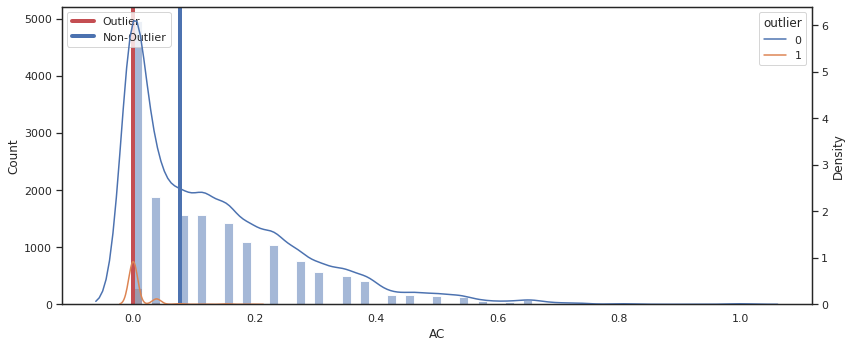

In [ ]:
hist_hue(data, target_hue_list=["AC", "outlier"])

In [ ]:
data.loc[:, "AC"].nunique()

22

In [ ]:
np.sort(data.loc[:, "AC"].unique())

array([0.        , 0.03846154, 0.07692308, 0.11538462, 0.15384615,
       0.19230769, 0.23076923, 0.26923077, 0.30769231, 0.34615385,
       0.38461538, 0.42307692, 0.46153846, 0.5       , 0.53846154,
       0.57692308, 0.61538462, 0.65384615, 0.69230769, 0.73076923,
       0.80769231, 1.        ])

It seems like AC is an ordinal feature, not a continuous type. So I think it will be better to transform it to binary format. As we can see almost all observations of the 1st class are near zero. let's divide the values of that feature into two groups. It will be equal to 0 if the value is more than 0.05, and equal to 1 otherwise

In [21]:
data.loc[:, "AC_binary"] = 1
data.loc[data["AC"]>0.05, "AC_binary"] = 0

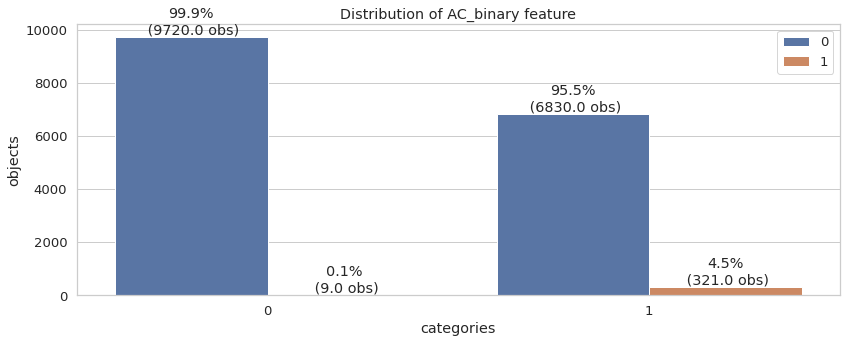

In [ ]:
plot_func(data=data, column_x="AC_binary", column_y='outlier')

In [ ]:
cross = pd.crosstab(data.loc[:, "AC_binary"], data.loc[:, "outlier"])
result, pvalue = cramers_corrected_stat(cross)

Cramers V: 0.156, p-value: 6.95e-92


There is sufficient evidence at the 0.05 level to conclude that there is a difference between groups divided by AC_binary.

In [22]:
extra.append("AC")

#### FM

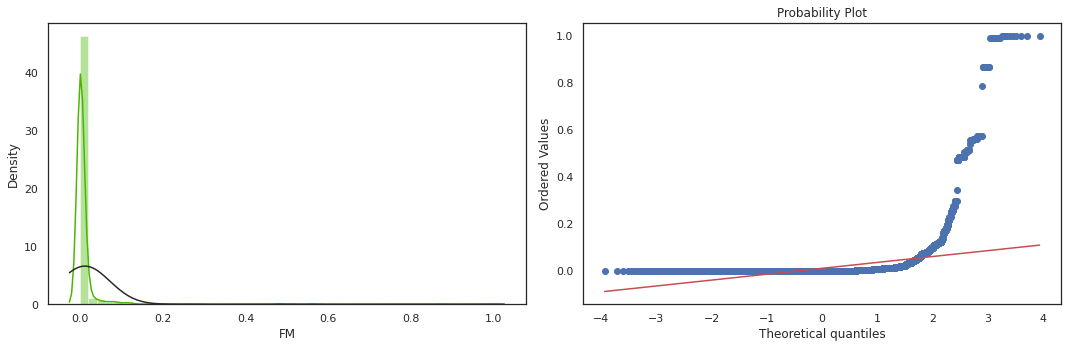

Skewness: 10.639654
Kurtosis: 135.533593 

null hypothesis: x comes from a normal distribution
p_value = 0.0, 26983.0489639712


In [ ]:
distribution_plot(data, target_col="FM")

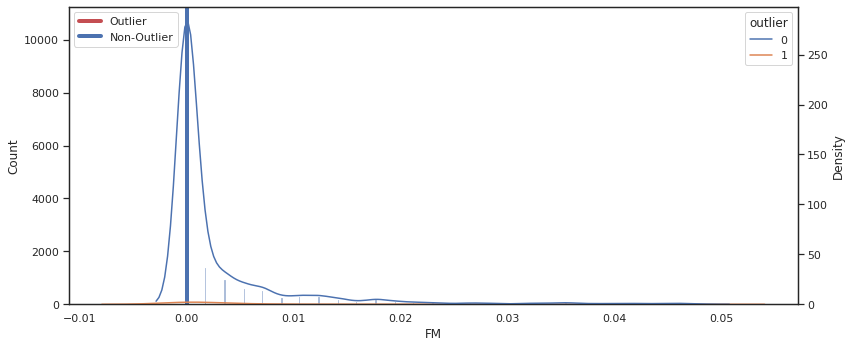

In [ ]:
hist_hue(data.loc[data["FM"]<0.05], target_hue_list=["FM", "outlier"])

The share of zeros values is too high. Lets try to tranform it to binary variable. 1 if it is not zero value, 0 otherwise

In [23]:
data.loc[:, "FM_binary"] = 0
data.loc[data["FM"] != 0, ["FM_binary"]] = 1

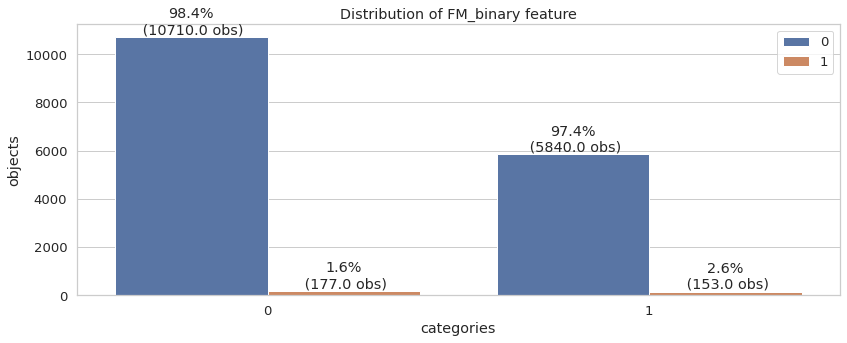

In [ ]:
plot_func(data=data, column_x="FM_binary", column_y='outlier')

In [ ]:
cross = pd.crosstab(data.loc[:, "FM_binary"], data.loc[:, "outlier"])
result, pvalue = cramers_corrected_stat(cross)

Cramers V: 0.031, p-value: 4.03e-05


There is sufficient evidence at the 0.05 level to conclude that there is a difference between groups divided by FM_binary.

In [24]:
extra.append("FM")

#### UC

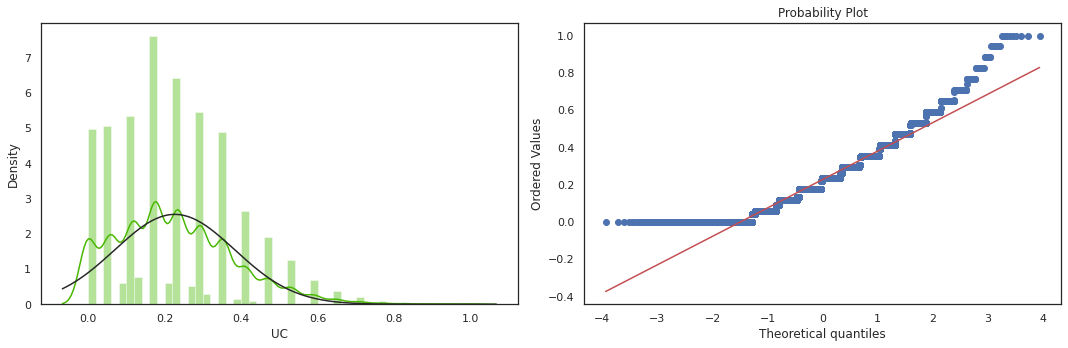

Skewness: 0.726470
Kurtosis: 0.705297 

null hypothesis: x comes from a normal distribution
p_value = 3.409221587201062e-305, 1402.1239387429898


In [ ]:
distribution_plot(data, target_col="UC")

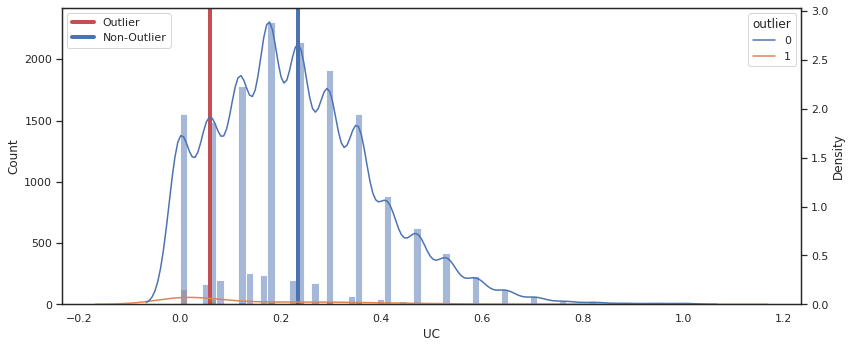

In [ ]:
hist_hue(data, target_hue_list=["UC", "outlier"])

In [25]:
q_uc = data.loc[:, "UC"].quantile([.3, .6, .8]).values
data.loc[:, "UC_categorical"] = 0
data.loc[data["UC"] >= q_uc[0], "UC_categorical"] = 1
data.loc[data["UC"] >= q_uc[1], "UC_categorical"] = 2
data.loc[data["UC"] >= q_uc[2], "UC_categorical"] = 3

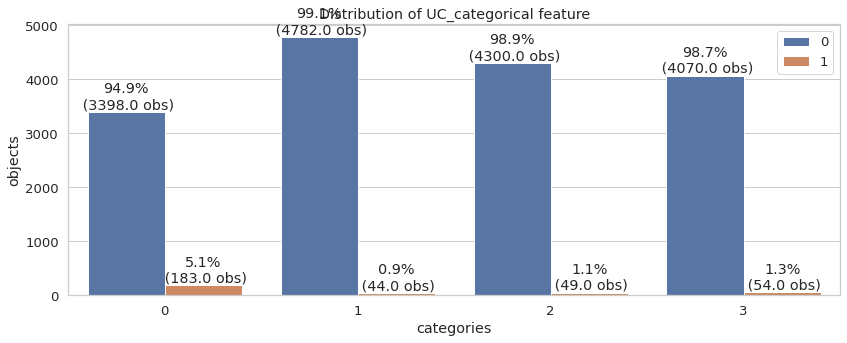

In [ ]:
plot_func(data=data, column_x="UC_categorical", column_y='outlier')

In [ ]:
cross = pd.crosstab(data.loc[:, "UC_categorical"], data.loc[:, "outlier"])
result, pvalue = cramers_corrected_stat(cross)

Cramers V: 0.118, p-value: 2.65e-51


There is sufficient evidence at the 0.05 level to conclude that there is a difference between groups divided by UC_categorical.

In [26]:
extra.append("UC")

#### ALTV

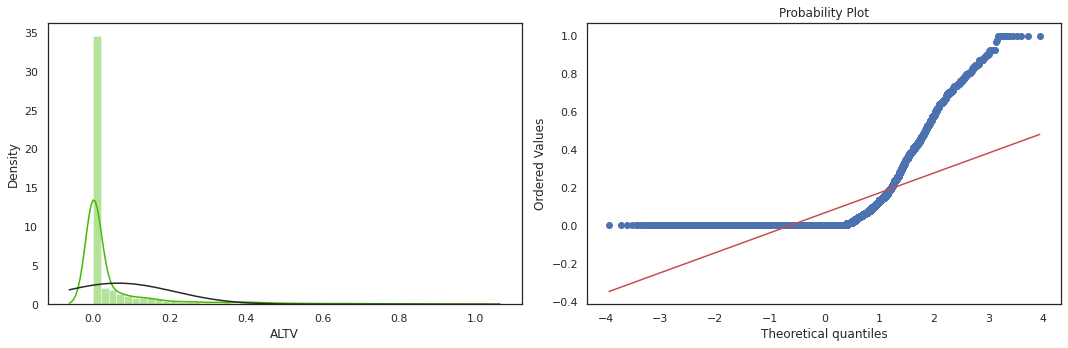

Skewness: 3.025023
Kurtosis: 9.704552 

null hypothesis: x comes from a normal distribution
p_value = 0.0, 10558.174708676188


In [ ]:
distribution_plot(data, target_col="ALTV")

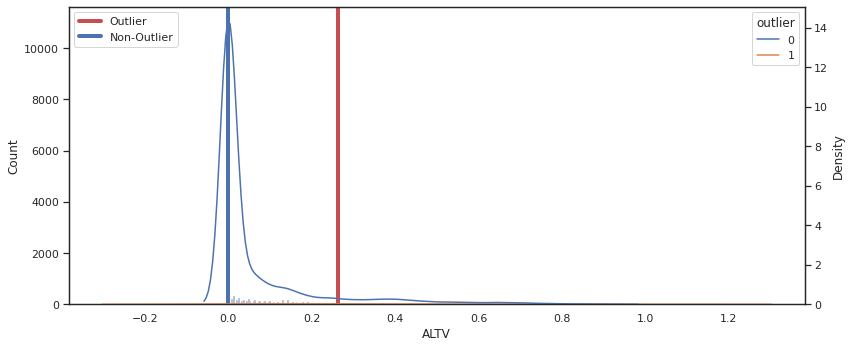

In [ ]:
hist_hue(data, target_hue_list=["ALTV", "outlier"])

In [27]:
data.loc[:, "ALTV_binary"] = 0
data.loc[data["ALTV"] != 0, ["ALTV_binary"]] = 1

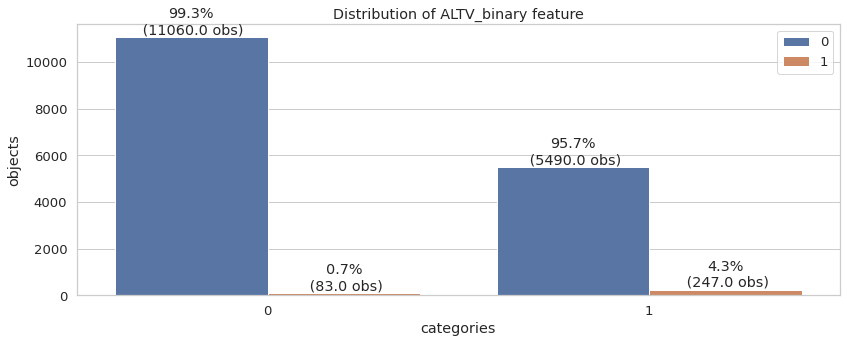

In [ ]:
plot_func(data=data, column_x="ALTV_binary", column_y='outlier')

In [ ]:
cross = pd.crosstab(data.loc[:, "ALTV_binary"], data.loc[:, "outlier"])
result, pvalue = cramers_corrected_stat(cross)

Cramers V: 0.121, p-value: 5.17e-56


There is sufficient evidence at the 0.05 level to conclude that there is a difference between groups divided by ALTV_binary.

In [28]:
extra.append("ALTV")

#### DL

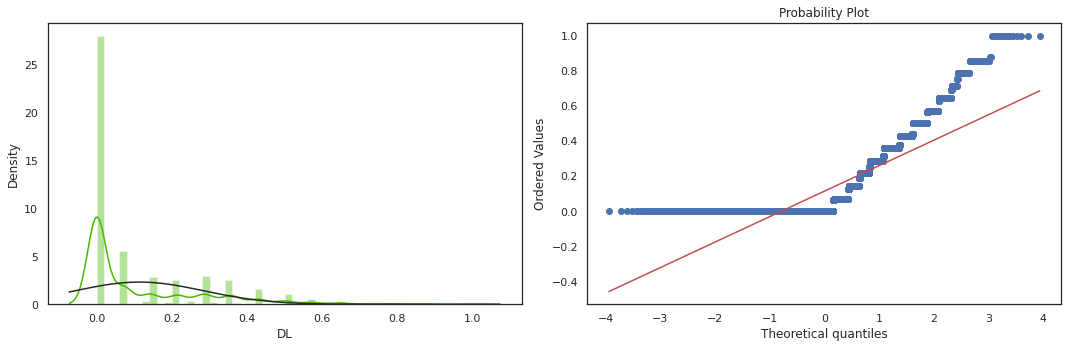

Skewness: 1.697292
Kurtosis: 2.686807 

null hypothesis: x comes from a normal distribution
p_value = 0.0, 5174.590701772464


In [ ]:
distribution_plot(data, target_col="DL")

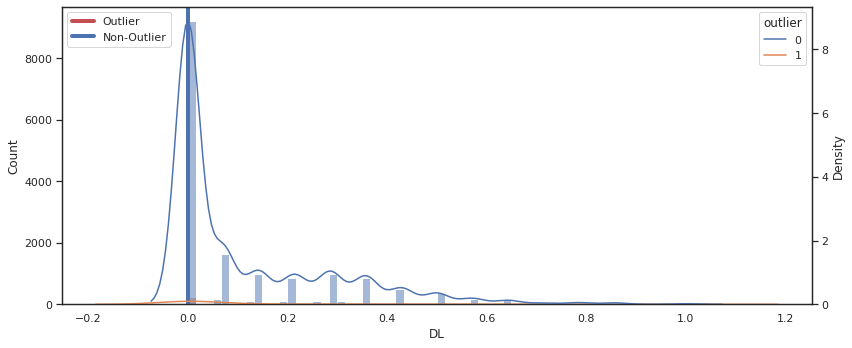

In [ ]:
hist_hue(data, target_hue_list=["DL", "outlier"])

In [29]:
data.loc[:, "DL_binary"] = 0
data.loc[data["DL"] != 0, "DL_binary"] = 1

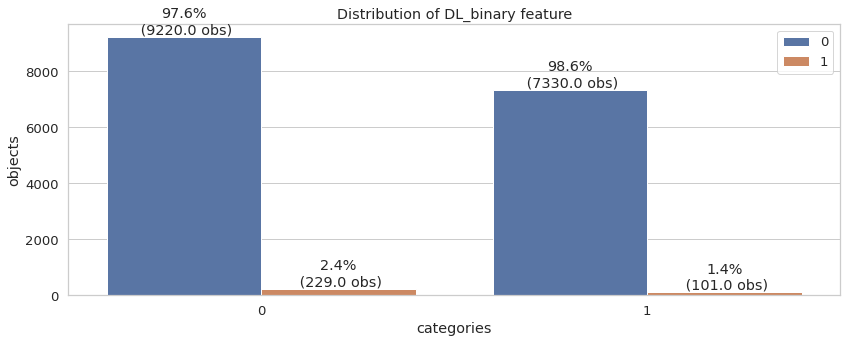

In [ ]:
plot_func(data=data, column_x="DL_binary", column_y='outlier')

In [ ]:
cross = pd.crosstab(data.loc[:, "DL_binary"], data.loc[:, "outlier"])
result, pvalue = cramers_corrected_stat(cross)

Cramers V: 0.037, p-value: 9.47e-07


There is sufficient evidence at the 0.05 level to conclude that there is a difference between groups divided by DL_binary.  
But it's kinda lame

In [30]:
extra.append("DL")

#### Nmax

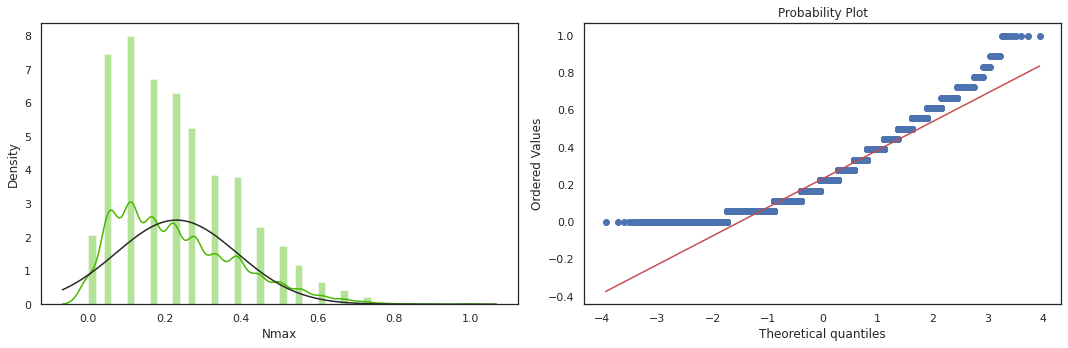

Skewness: 0.845508
Kurtosis: 0.459515 

null hypothesis: x comes from a normal distribution
p_value = 0.0, 1642.0192458678803


In [ ]:
distribution_plot(data, target_col="Nmax")

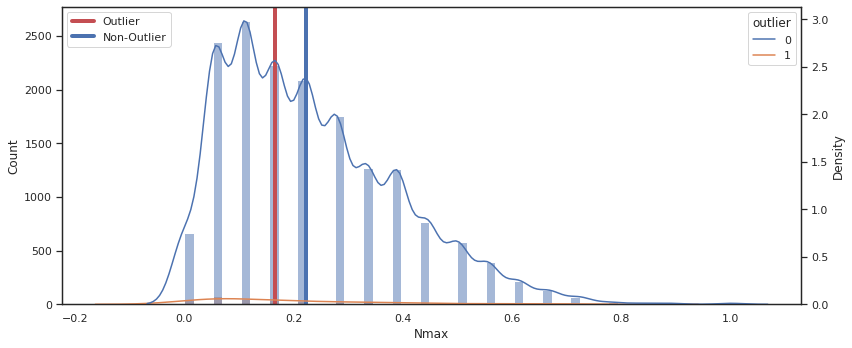

In [ ]:
hist_hue(data, target_hue_list=["Nmax", "outlier"])

In [31]:
q_nmax = data.loc[:, "Nmax"].quantile([.25, .6, .8]).values
data.loc[:, "Nmax_categorical"] = 0
data.loc[data["Nmax"] >= q_uc[0], "Nmax_categorical"] = 1
data.loc[data["Nmax"] >= q_uc[1], "Nmax_categorical"] = 2
data.loc[data["Nmax"] >= q_uc[2], "Nmax_categorical"] = 3

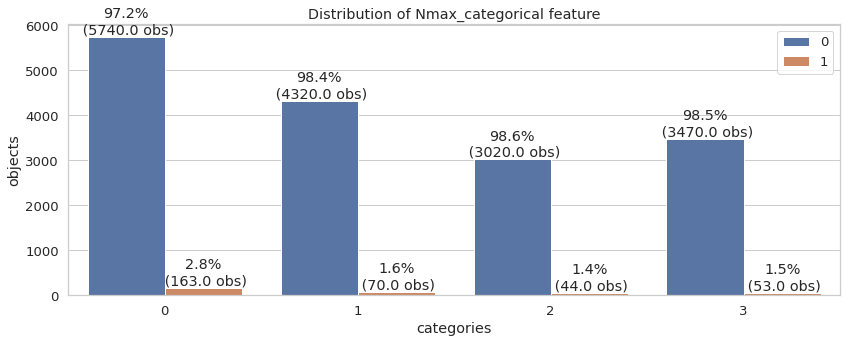

In [ ]:
plot_func(data=data, column_x="Nmax_categorical", column_y='outlier')

In [ ]:
cross = pd.crosstab(data.loc[:, "Nmax_categorical"], data.loc[:, "outlier"])
result, pvalue = cramers_corrected_stat(cross)

Cramers V: 0.041, p-value: 8.36e-07


There is sufficient evidence at the 0.05 level to conclude that there is a difference between groups divided by Nmax_categorical.

In [32]:
extra.append("Nmax")

#### Nzeros

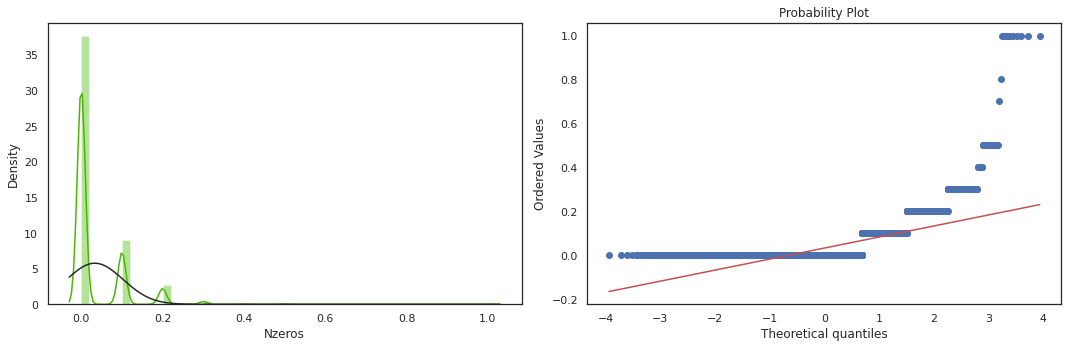

Skewness: 3.589836
Kurtosis: 28.044525 

null hypothesis: x comes from a normal distribution
p_value = 0.0, 13659.424659486547


In [ ]:
distribution_plot(data, target_col="Nzeros")

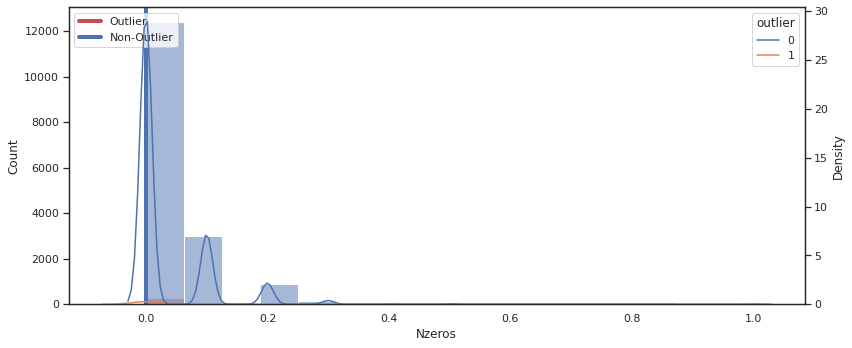

In [ ]:
hist_hue(data, target_hue_list=["Nzeros", "outlier"])

In [33]:
data.loc[:, "Nzeros_binary"] = 1
data.loc[data["Nzeros"] != 0, "Nzeros_binary"] = 0

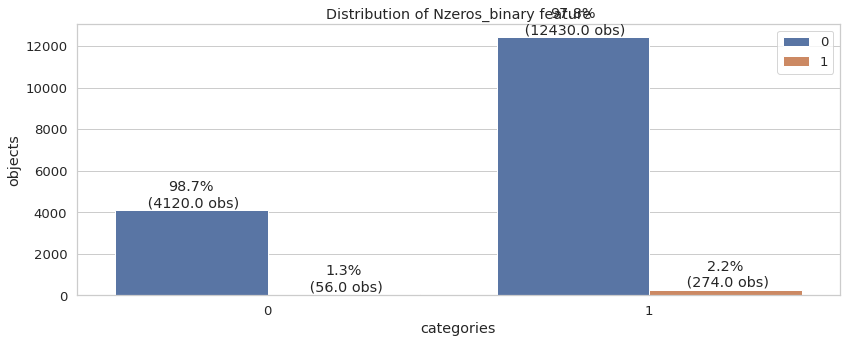

In [ ]:
plot_func(data=data, column_x="Nzeros_binary", column_y='outlier')

In [ ]:
cross = pd.crosstab(data.loc[:, "Nzeros_binary"], data.loc[:, "outlier"])
result, pvalue = cramers_corrected_stat(cross)

Cramers V: 0.024, p-value: 0.0012


There is sufficient evidence at the 0.05 level to conclude that there is a difference between groups divided by Nmax_categorical.  
But it's kinda lame too

In [34]:
extra.append("Nzeros")

####  LB

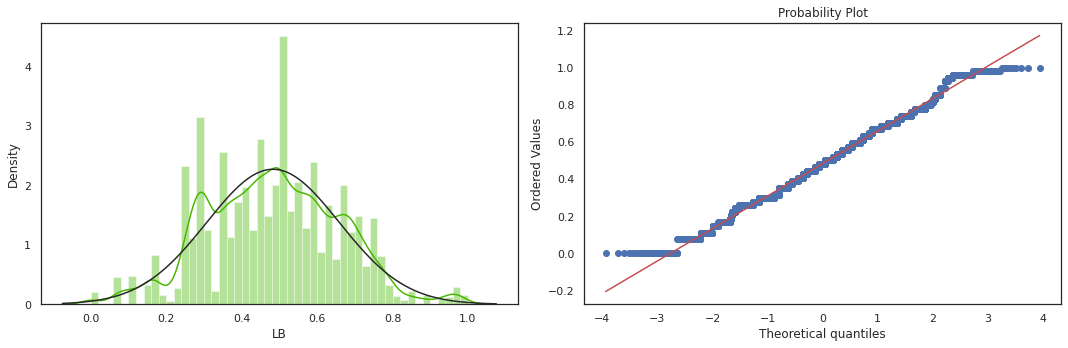

Skewness: 0.070211
Kurtosis: -0.135805 

null hypothesis: x comes from a normal distribution
p_value = 5.940869544326594e-07, 28.672480280727328


In [ ]:
distribution_plot(data, target_col="LB")

Переменная распределена довольно неплохо, нет необходимости делать какие либо трансформации

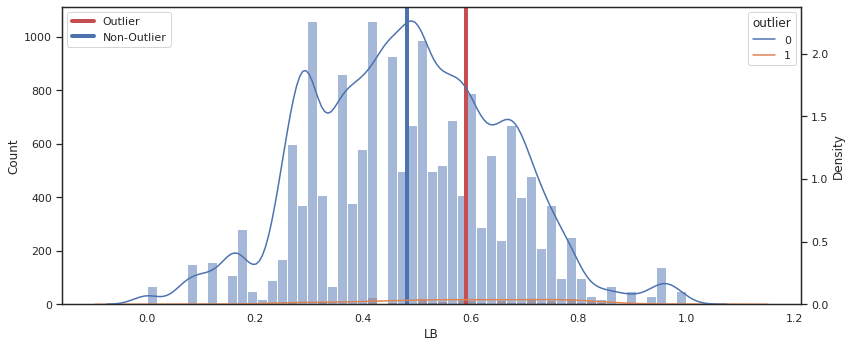

In [ ]:
hist_hue(data, target_hue_list=["LB", "outlier"])

In [ ]:
sample1 = data.loc[data["outlier"] == 0, "LB"].values
sample2 = data.loc[data["outlier"] == 1, "LB"].values
# The result of student t-test
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=-10.719256420623598, pvalue=1.0077128443419234e-26)

There is sufficient evidence at the level 0.05 to conclude that there is a difference in means LB between groups.

#### ASTV

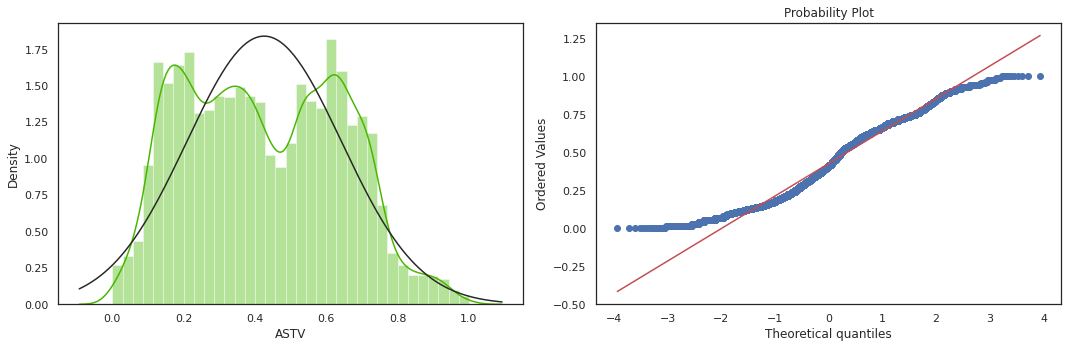

Skewness: 0.151495
Kurtosis: -0.972806 

null hypothesis: x comes from a normal distribution
p_value = 0.0, 3410.8933826549564


In [ ]:
distribution_plot(data, target_col="ASTV")

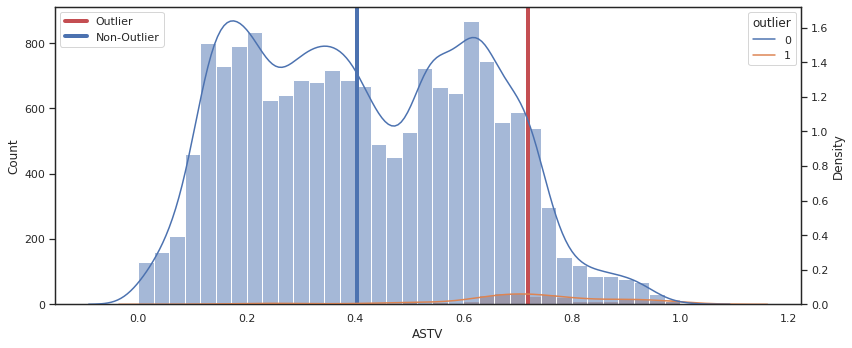

In [ ]:
hist_hue(data, target_hue_list=["ASTV", "outlier"])

In [ ]:
sample1 = data.loc[data["outlier"] == 0, "ASTV"].values
sample2 = data.loc[data["outlier"] == 1, "ASTV"].values
# The result of student t-test
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=-25.150902251936326, pvalue=4.568873829744719e-137)

There is sufficient evidence at the level 0.05 to conclude that there is a difference in means ASTV between groups.

#### MSTV

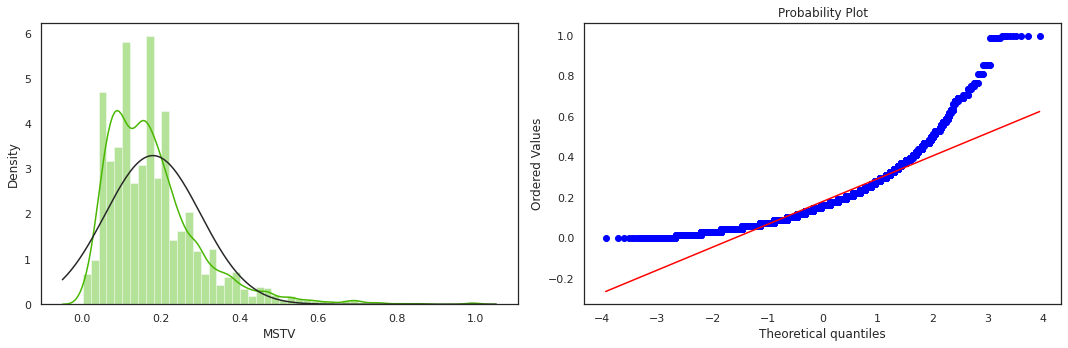

Skewness: 1.808240
Kurtosis: 5.511814 

null hypothesis: x comes from a normal distribution
p_value = 0.0, 6425.434198641024
The null hypothesis can be rejected
Oops, We shoukd try to transform the distribution!


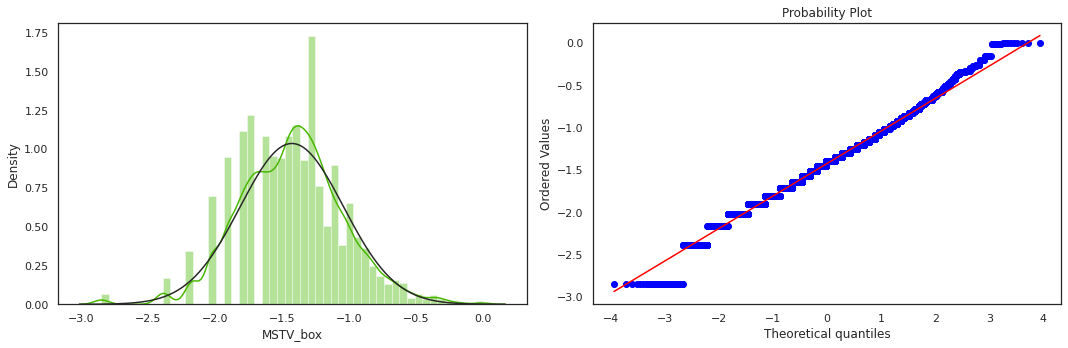

Skewness: 0.054835
Kurtosis: 0.634101 

null hypothesis: x comes from a normal distribution
p_value = 6.87048309890887e-39, 175.7471684058636
The null hypothesis still can be rejected
But we did our best


In [35]:
data.loc[data["MSTV"] == 0, 'MSTV'] = data.loc[data["MSTV"] != 0, "MSTV"].min() * 0.1
data.loc[:, 'MSTV_box'], lmbda_mstv = dist_graph(data.copy(), target_col='MSTV')

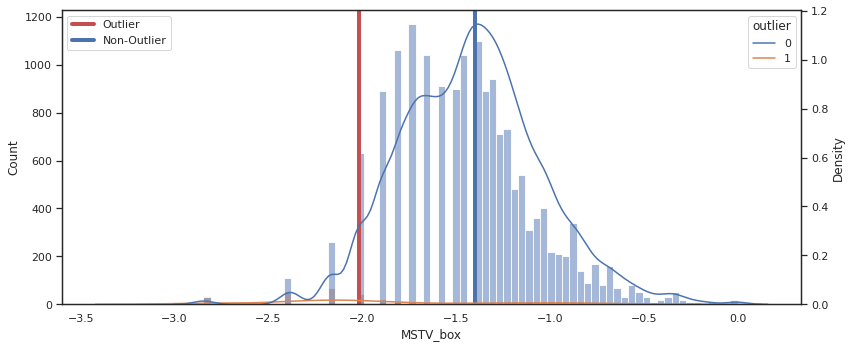

In [ ]:
hist_hue(data, target_hue_list=["MSTV_box", "outlier"])

In [ ]:
sample1 = data.loc[data["outlier"] == 0, "MSTV_box"].values
sample2 = data.loc[data["outlier"] == 1, "MSTV_box"].values
# The result of student t-test
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=22.87766956249974, pvalue=4.194651599126596e-114)

There is sufficient evidence at the level 0.05 to conclude that there is a difference in means MSTV_box between groups.

In [36]:
extra.append("MSTV")

#### MLTV

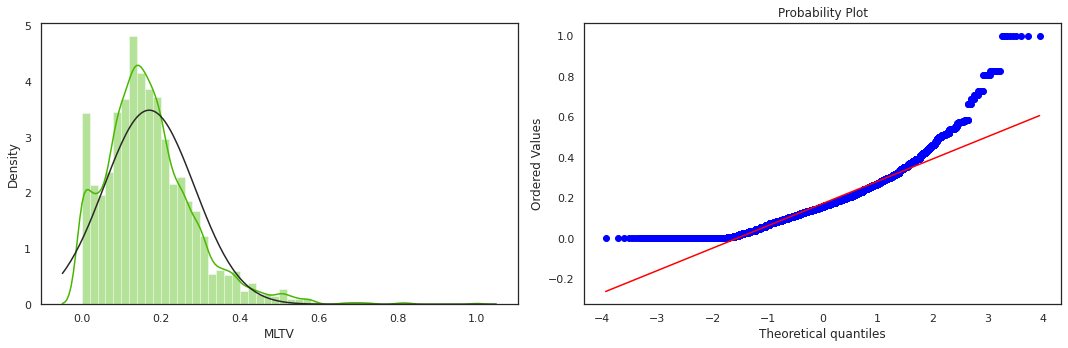

Skewness: 1.312473
Kurtosis: 3.936855 

null hypothesis: x comes from a normal distribution
p_value = 0.0, 4474.068558815758
The null hypothesis can be rejected
Oops, We shoukd try to transform the distribution!


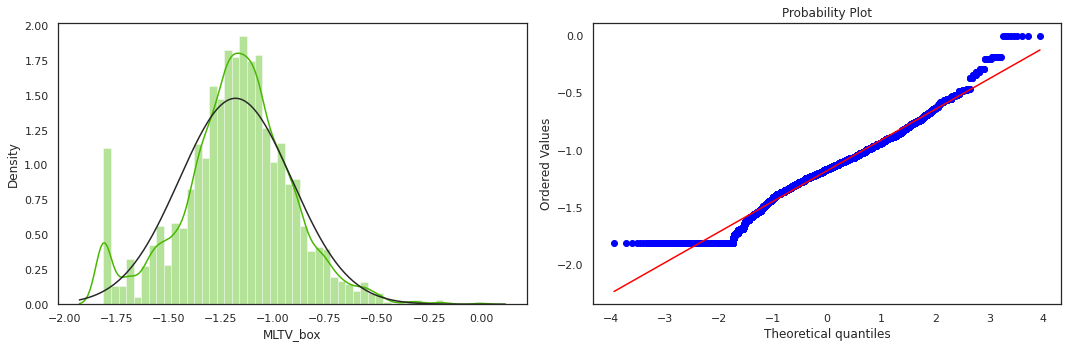

Skewness: -0.130260
Kurtosis: 0.640993 

null hypothesis: x comes from a normal distribution
p_value = 5.928205987316265e-48, 217.4887256562527
The null hypothesis still can be rejected
But we did our best


In [37]:
data.loc[data["MLTV"] == 0, 'MLTV'] = data.loc[data["MLTV"] != 0, "MLTV"].min() * 0.1
data.loc[:, 'MLTV_box'], lmbda_mstv = dist_graph(data.copy(), target_col='MLTV')

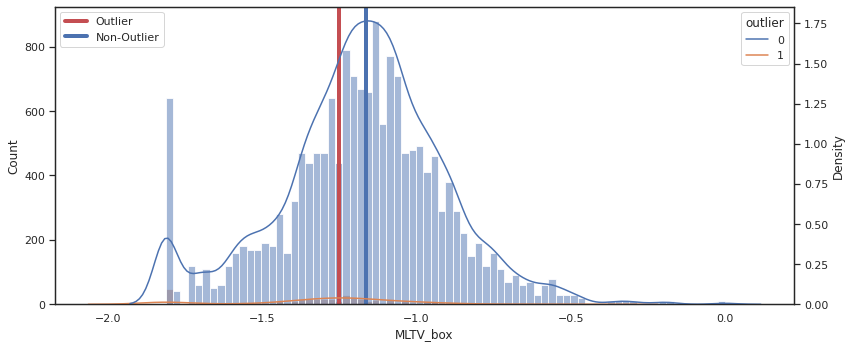

In [ ]:
hist_hue(data, target_hue_list=["MLTV_box", "outlier"])

In [ ]:
sample1 = data.loc[data["outlier"] == 0, "MLTV_box"].values
sample2 = data.loc[data["outlier"] == 1, "MLTV_box"].values
# The result of student t-test
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=7.7801876470662945, pvalue=7.658197628848366e-15)

There is sufficient evidence at the level 0.05 to conclude that there is a difference in means MLTV_box between groups.

In [38]:
extra.append("MLTV")

#### Width

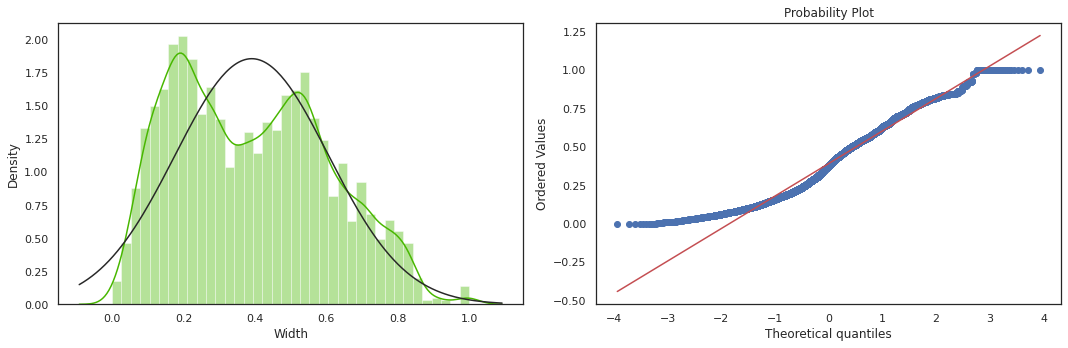

Skewness: 0.319591
Kurtosis: -0.816352 

null hypothesis: x comes from a normal distribution
p_value = 0.0, 1822.209074027551


In [ ]:
distribution_plot(data, target_col="Width")

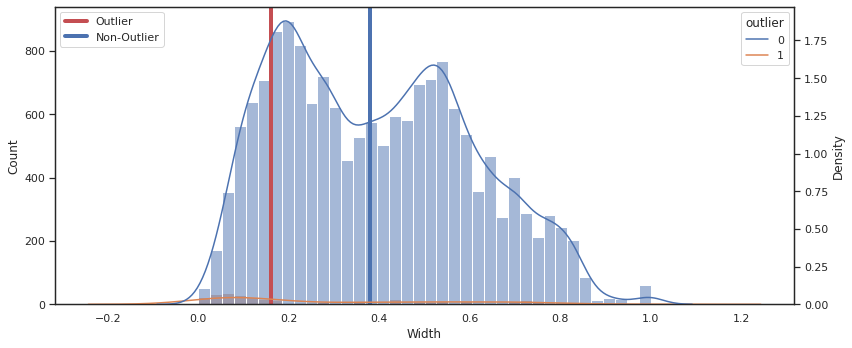

In [ ]:
hist_hue(data, target_hue_list=["Width", "outlier"])

In [ ]:
sample1 = data.loc[data["outlier"] == 0, "Width"].values
sample2 = data.loc[data["outlier"] == 1, "Width"].values
# The result of student t-test
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=8.688524106748252, pvalue=4.003048913899715e-18)

There is sufficient evidence at the level 0.05 to conclude that there is a difference in means Width between groups.

#### Min

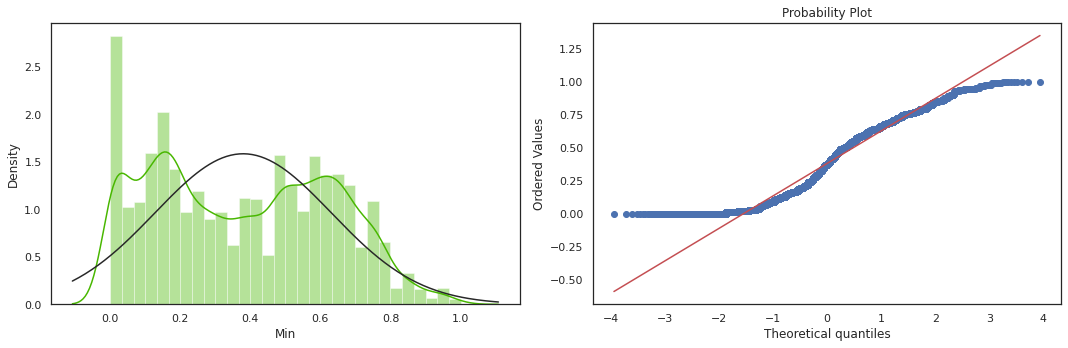

Skewness: 0.153949
Kurtosis: -1.155465 

null hypothesis: x comes from a normal distribution
p_value = 0.0, 10279.082555051056


In [ ]:
distribution_plot(data, target_col="Min")

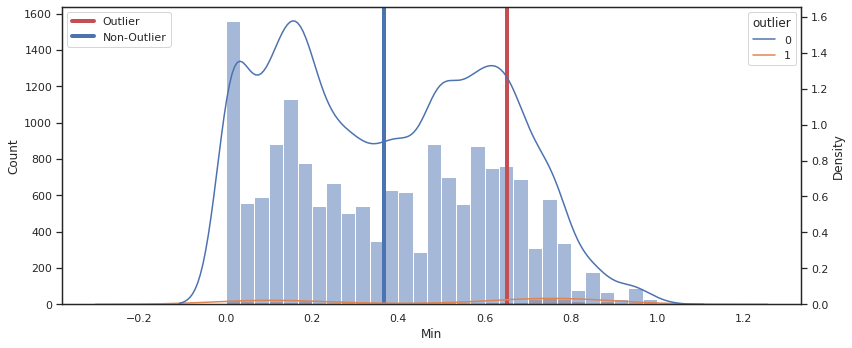

In [ ]:
hist_hue(data, target_hue_list=["Min", "outlier"])

In [ ]:
sample1 = data.loc[data["outlier"] == 0, "Min"].values
sample2 = data.loc[data["outlier"] == 1, "Min"].values
# The result of student t-test
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=-9.058675439579899, pvalue=1.4619892071685128e-19)

There is sufficient evidence at the level 0.05 to conclude that there is a difference in means Min between groups.

#### Max

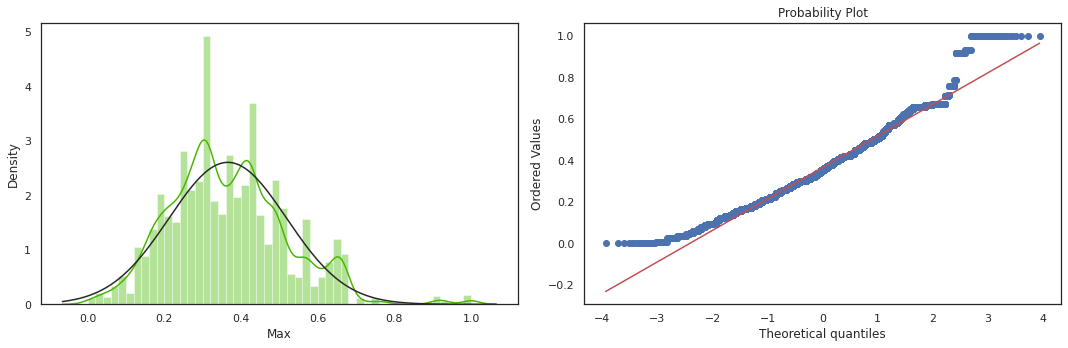

Skewness: 0.574923
Kurtosis: 0.831475 

null hypothesis: x comes from a normal distribution
p_value = 8.427747654941755e-231, 1059.5312538548098


In [ ]:
distribution_plot(data, target_col="Max")

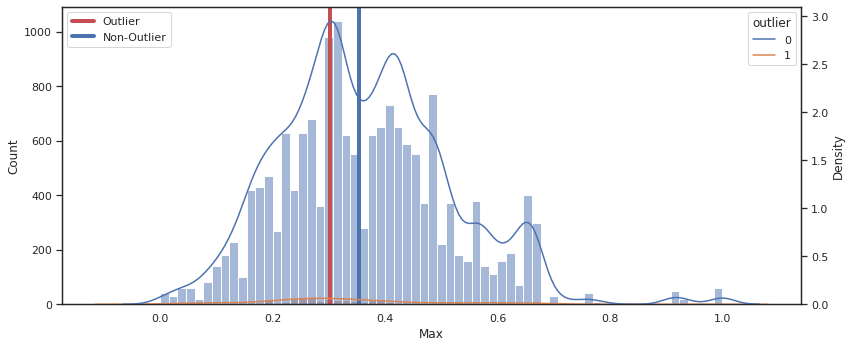

In [ ]:
hist_hue(data, target_hue_list=["Max", "outlier"])

In [ ]:
sample1 = data.loc[data["outlier"] == 0, "Max"].values
sample2 = data.loc[data["outlier"] == 1, "Max"].values
# The result of student t-test
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=3.9203171440907085, pvalue=8.878180567733862e-05)

There is sufficient evidence at the level 0.05 to conclude that there is a difference in means Max between groups.

####  Mode

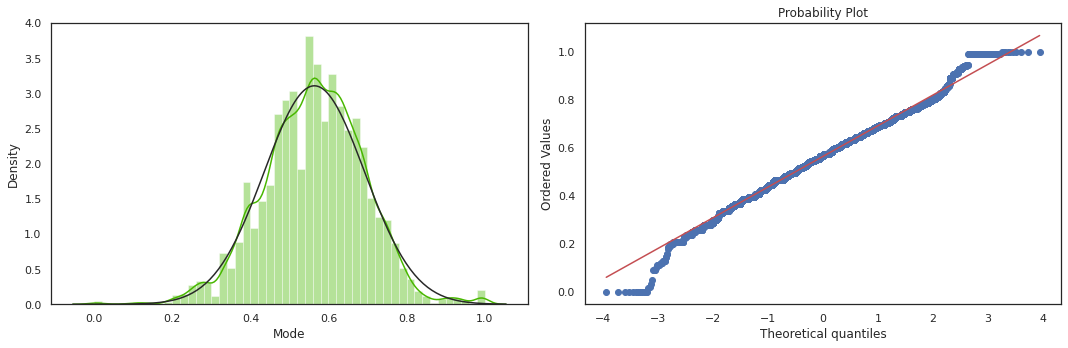

Skewness: -0.099986
Kurtosis: 0.587687 

null hypothesis: x comes from a normal distribution
p_value = 4.5478270071359785e-39, 176.57233817746442


In [ ]:
distribution_plot(data, target_col="Mode")

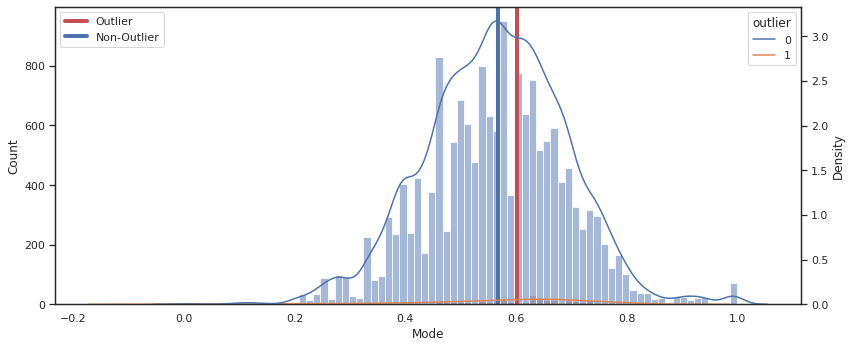

In [ ]:
hist_hue(data, target_hue_list=["Mode", "outlier"])

In [ ]:
sample1 = data.loc[data["outlier"] == 0, "Mode"].values
sample2 = data.loc[data["outlier"] == 1, "Mode"].values
# The result of student t-test
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=1.8560625155334927, pvalue=0.06346206429950983)

There is not enough evidence at the level 0.05 to conclude that there is a difference in mean Mode between groups. But it seems like we can try to use this feature in our model

#### Mean

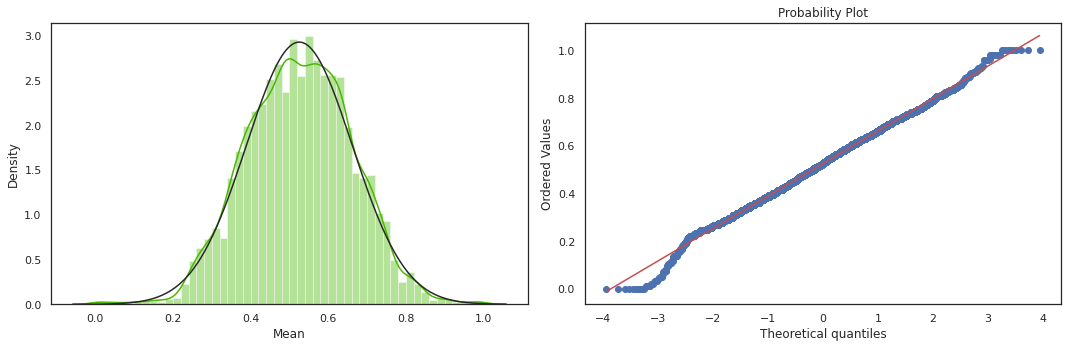

Skewness: -0.042545
Kurtosis: 0.053645 

null hypothesis: x comes from a normal distribution
p_value = 0.029206164208747738, 7.0667509778954125


In [ ]:
distribution_plot(data, target_col="Mean")

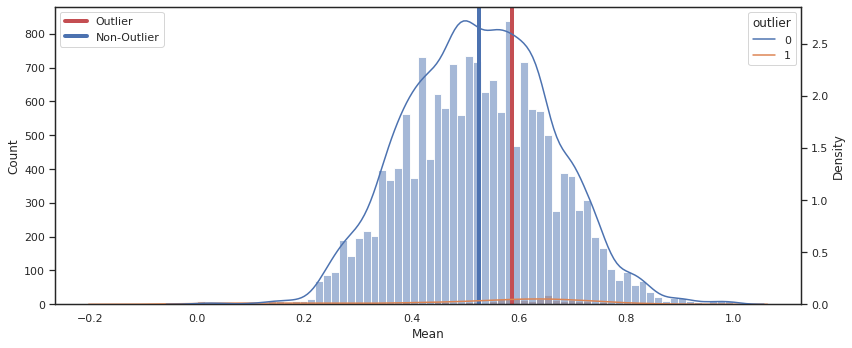

In [ ]:
hist_hue(data, target_hue_list=["Mean", "outlier"])

In [ ]:
sample1 = data.loc[data["outlier"] == 0, "Mean"].values
sample2 = data.loc[data["outlier"] == 1, "Mean"].values
# The result of student t-test
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=1.6822155830591041, pvalue=0.09254554155079273)

There is not enough evidence at the level 0.05 to conclude that there is a difference in mean Mode between groups. It is an even less confident difference than in a previous case, but it's okay

#### Median

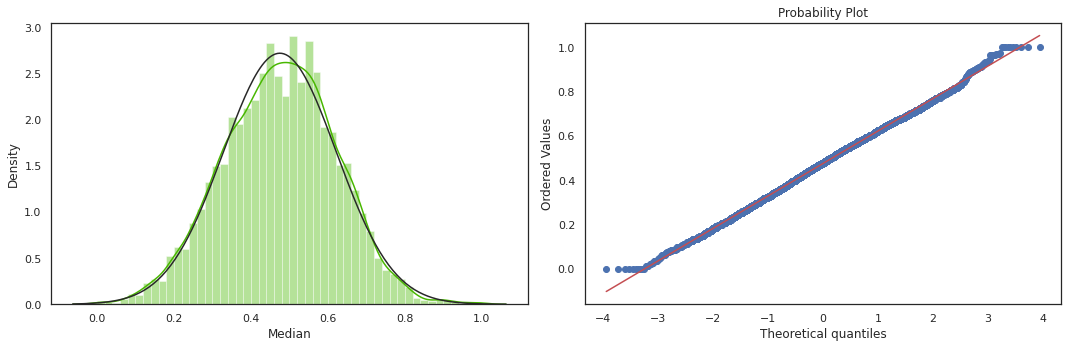

Skewness: -0.043932
Kurtosis: -0.068083 

null hypothesis: x comes from a normal distribution
p_value = 0.011925280674658414, 8.858189411651457


In [ ]:
distribution_plot(data, target_col="Median")

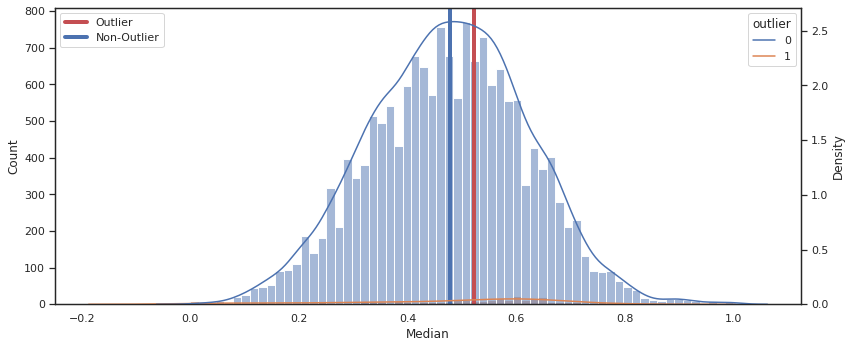

In [ ]:
hist_hue(data, target_hue_list=["Median", "outlier"])

In [ ]:
sample1 = data.loc[data["outlier"] == 0, "Median"].values
sample2 = data.loc[data["outlier"] == 1, "Median"].values
# The result of student t-test
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=0.8097340659193761, pvalue=0.41810445001605745)

There is not enough evidence at the level 0.05 to conclude that there is a difference in mean Mode between groups.

#### Variance

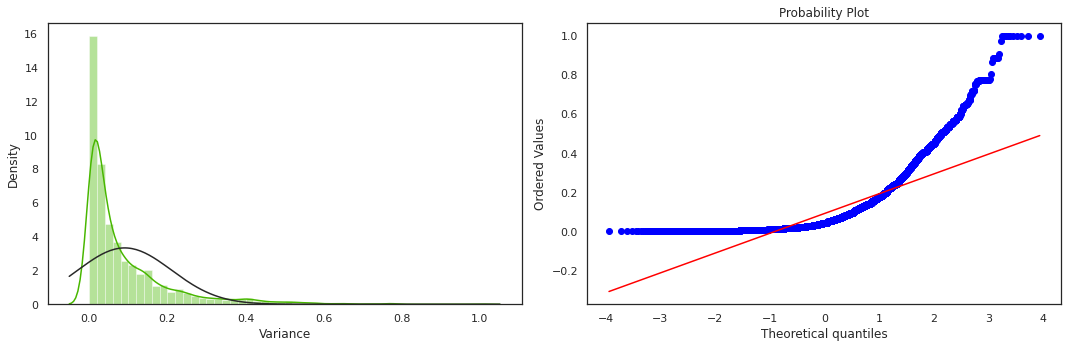

Skewness: 2.511664
Kurtosis: 8.268755 

null hypothesis: x comes from a normal distribution
p_value = 0.0, 9001.800112072926
The null hypothesis can be rejected
Oops, We shoukd try to transform the distribution!


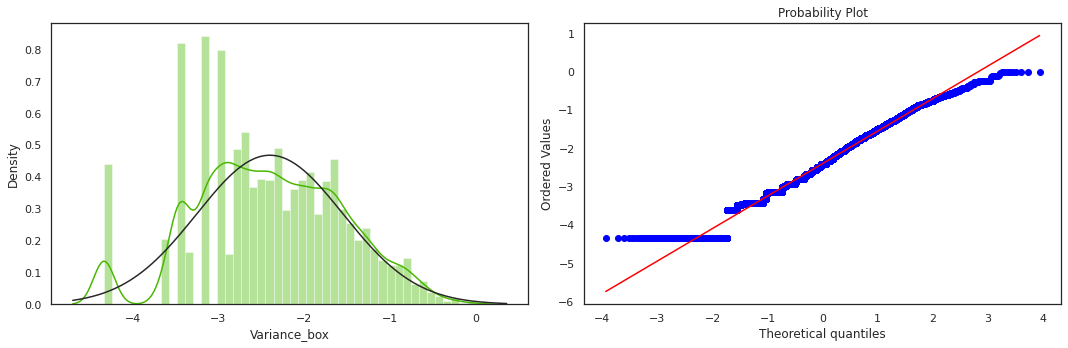

Skewness: -0.026511
Kurtosis: -0.303435 

null hypothesis: x comes from a normal distribution
p_value = 7.747954548711583e-21, 92.6137161470873
The null hypothesis still can be rejected
But we did our best


In [39]:
data.loc[data["Variance"] == 0, 'Variance'] = data.loc[data["Variance"] != 0, "Variance"].min() * 0.1
data.loc[:, 'Variance_box'], lmbda_Variance = dist_graph(data.copy(), target_col='Variance')

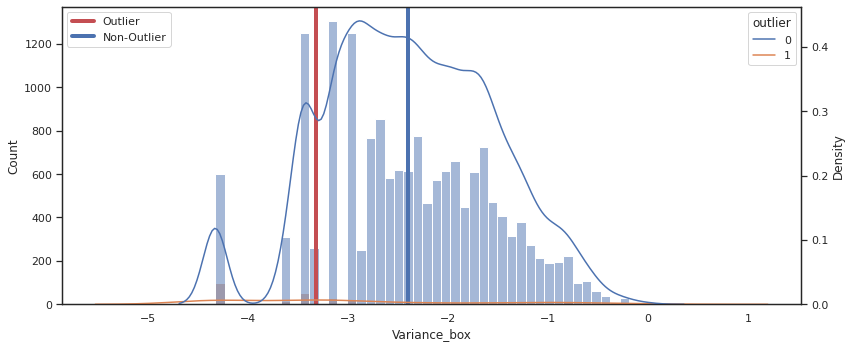

In [ ]:
hist_hue(data, target_hue_list=["Variance_box", "outlier"])

In [ ]:
sample1 = data.loc[data["outlier"] == 0, "Variance_box"].values
sample2 = data.loc[data["outlier"] == 1, "Variance_box"].values
# The result of student t-test
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=12.3392967145973, pvalue=7.862639386980264e-35)

There is sufficient evidence at the level 0.05 to conclude that there is a difference in means Variance_box between groups.

In [40]:
extra.append("Variance")

### Categorical

#### DP

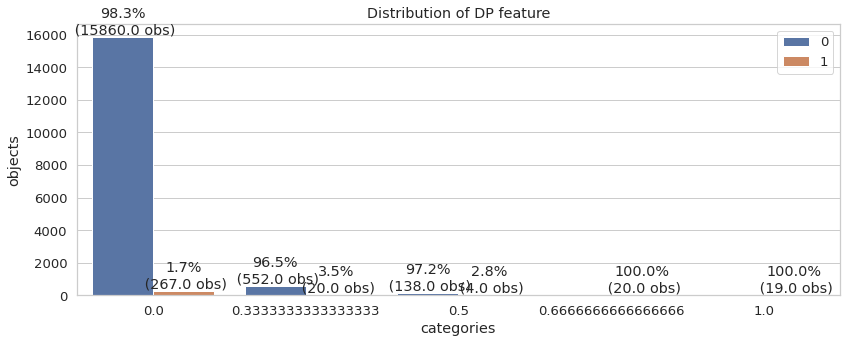

In [ ]:
plot_func(data=data, column_x="DP", column_y='outlier')

In [41]:
data.loc[data["DP"] >= 0.5, "DP"] = 0
data.loc[data["DP"] != 0 , "DP"] = 1

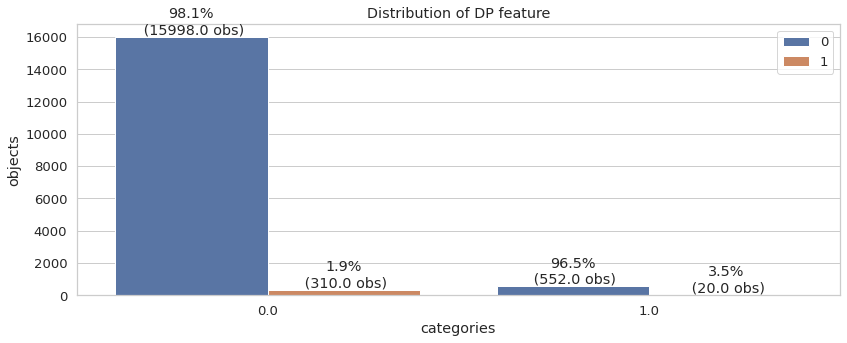

In [ ]:
plot_func(data=data, column_x="DP", column_y='outlier')

In [ ]:
cross = pd.crosstab(data.loc[:, "DP"], data.loc[:, "outlier"])
result, pvalue = cramers_corrected_stat(cross)

Cramers V: 0.018, p-value: 0.0106


There is sufficient evidence at the 0.05 level to conclude that there is a difference between groups divided by DP. But it could be better

#### DS

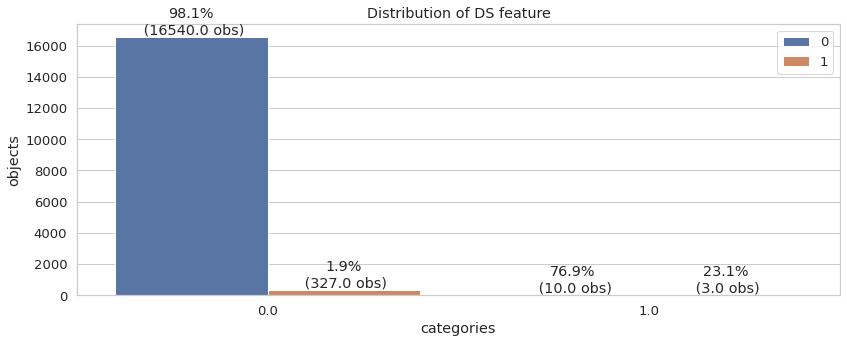

In [ ]:
plot_func(data=data, column_x="DS", column_y='outlier')

I consider we should try to drop this feature, it is too imbalance

In [42]:
data.drop(columns=["DS"], inplace=True)

#### Tendency

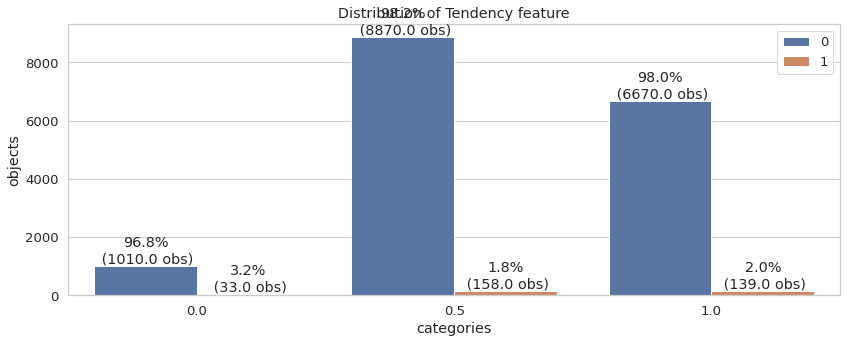

In [ ]:
plot_func(data=data, column_x="Tendency", column_y='outlier')

In [ ]:
cross = pd.crosstab(data.loc[data["Tendency"] != 0, "Tendency"], data.loc[data["Tendency"] != 0, "outlier"])
result, pvalue = cramers_corrected_stat(cross)

Cramers V: 0.006, p-value: 0.201


There is not enough evidence at the 0.05 level to conclude that there is a difference between groups divided by Tendency.  

In [38]:
# data.drop(columns=["Tendency"], inplace=True)

## Multivariate analysis

### Numerical

In [43]:
data.drop(columns=extra, inplace=True)

In [44]:
data.loc[:, ['AC_binary', 'FM_binary', 'UC_categorical', 'ALTV_binary',
       'DL_binary', 'Nmax_categorical', 'Nzeros_binary', 'DP', 'Tendency']] = data.loc[:, ['AC_binary', 'FM_binary', 'UC_categorical', 'ALTV_binary',
       'DL_binary', 'Nmax_categorical', 'Nzeros_binary', 'DP', 'Tendency']].astype("category")
data["outlier"] = data["outlier"].astype(int)

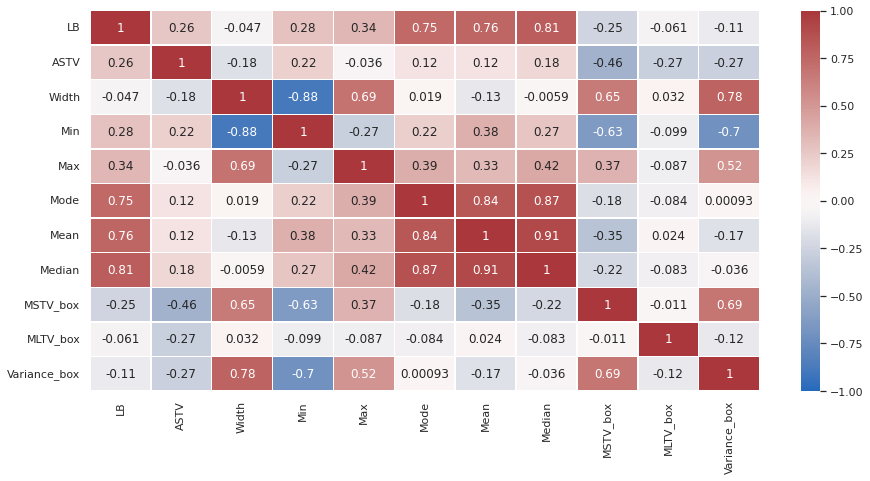

In [45]:
# there is no multicollinearity
corr_1 = data.select_dtypes(include=[np.float])
f, ax = plt.subplots(figsize=(15,7))
sns.heatmap(corr_1.corr(method='pearson'), vmin=-1, vmax=1, linewidths=0.5, cmap = 'vlag', annot=True)
plt.yticks(rotation = 0)
plt.show()

Now we have to remove Mean and Median because of their high correlation with themselves. Also, it would be useful to drop Min or Width, but I will rely on regularization

In [45]:
data.drop(columns=["Median", "Mean"], inplace=True)

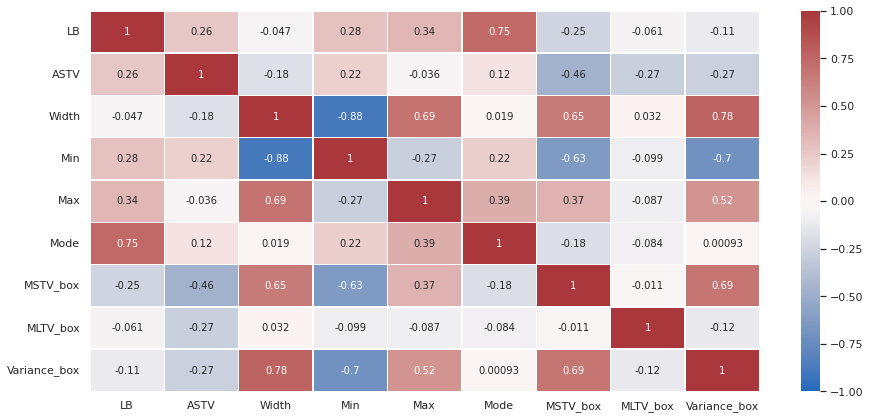

In [52]:
# there is no multicollinearity
corr_1 = data.select_dtypes(include=[np.float])
f, ax = plt.subplots(figsize=(15,7))
sns.heatmap(corr_1.corr(method='pearson'), vmin=-1, vmax=1, linewidths=0.5, cmap = 'vlag', annot=True)
plt.yticks(rotation = 0)
plt.show()

### Categorical

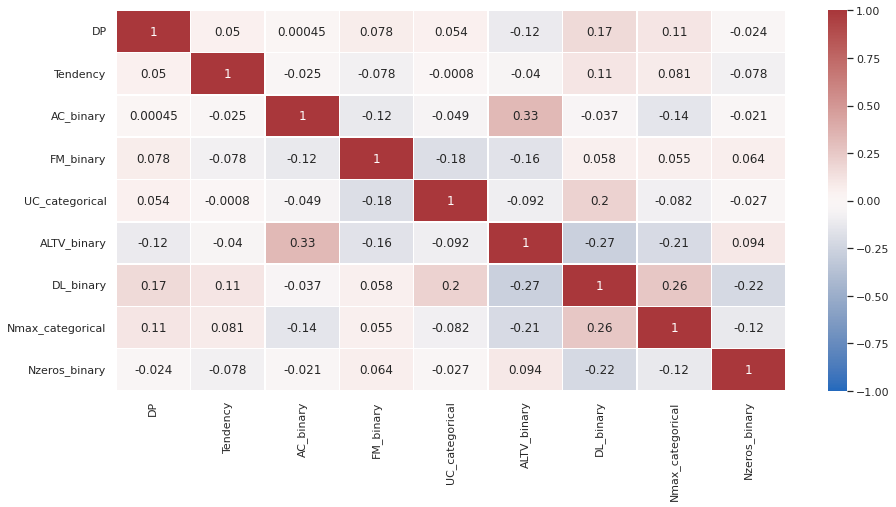

In [53]:
data_corr = pd.DataFrame(index=data.select_dtypes(include=["category"]).columns, columns=data.select_dtypes(include=["category"]).columns)

for column in data_corr.columns:
    for index in data_corr.index:
        contingency_table = pd.crosstab(data.select_dtypes(include=["category"]).loc[:,column], data.select_dtypes(include=["category"]).loc[:, index])
        data_corr.loc[index, column] = matthews_cc(contingency_table)

sns.set(font_scale=1)
corr_0 = data_corr.astype(float).copy()
f, ax = plt.subplots(figsize=(15,7))
sns.heatmap(corr_0, vmin=-1, vmax=1, linewidths=0.5, cmap = 'vlag', annot=True)
plt.yticks(rotation = 0)
plt.show()

There are no realy high correlated categorical features

In [ ]:
sns.pairplot(data.select_dtypes(include=[np.float, np.int]), hue="outlier")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Beautiful, it seems like we have good chances to detect outliers 

# Data preparation

In [46]:
columns_to_norm = data.select_dtypes(include=[np.float]).columns.values

scaler = StandardScaler()
data.loc[:, columns_to_norm] = scaler.fit_transform(data.loc[:, columns_to_norm])

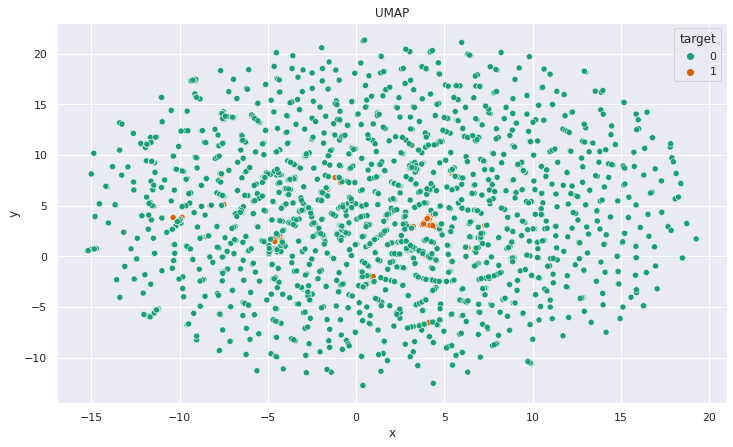

In [ ]:
embedding = umap.UMAP(n_neighbors=15, min_dist=0.15).fit_transform(data.drop(columns=["outlier"]))
plot_df = pd.DataFrame.from_records(data=embedding, columns=["x","y"])
plot_df["target"] = data.loc[:, "outlier"]

fig = plt.figure(figsize=(12,7))
plt.title(f"UMAP")
sns.scatterplot("x", "y", data=plot_df, hue="target", palette="Dark2")
plt.show()

In [47]:
x_data = data.drop(columns=["outlier"])
y_data = data.loc[:, ["outlier"]]
x_data = x_data.astype(float)

# Mahalanobis rule

In [48]:
covariance_inverse = np.linalg.inv(np.cov(x_data.select_dtypes(include=[np.float]).T))
mean_vector = x_data.mean(axis=0)

bias_distance = x_data.select_dtypes(include=[np.float]).apply(lambda row:
                            mahalanobis(mean_vector, row, VI=covariance_inverse), 
                            axis=1)

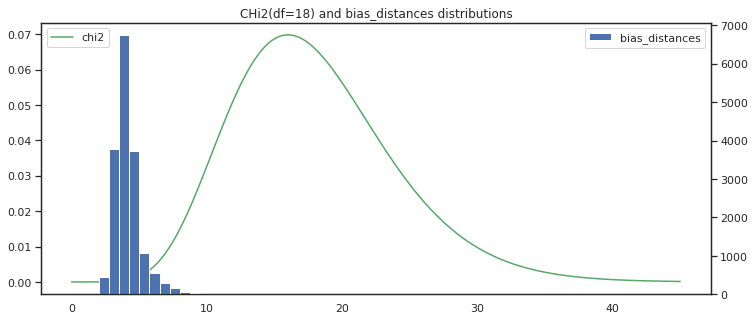

In [49]:
sns.set(style="white")
x = np.arange(0, 45, 0.001)
fig, ax1 = plt.subplots(figsize=(12,5))
plt.plot(x, chi2.pdf(x, df=x_data.select_dtypes(include=[np.float]).shape[1]), "g", label="chi2")
ax2 = ax1.twinx()
ax2.hist(bias_distance, label="bias_distances")
plt.title("CHi2(df=18) and bias_distances distributions")
ax2.legend()
ax1.legend(loc="upper left")
plt.show()

In [50]:
val = chi2.ppf([0.95], x_data.select_dtypes(include=[np.float]).shape[1])[0]
print("outliers threshold should be equal to:", val)

outliers threshold should be equal to: 28.869299430392623


As we know bias distances should be distributed as chi2 with 18 df. So let's consider outliers as points with value more than 28

In [51]:
predictions = np.zeros(x_data.shape[0])
predictions[bias_distance > 6] = 1 #  vals[0]
y_data["outlier_mah"] = predictions

In [55]:
print(classification_report(y_data["outlier"], predictions))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     16550
           1       0.05      0.15      0.08       330

    accuracy                           0.93     16880
   macro avg       0.52      0.55      0.52     16880
weighted avg       0.96      0.93      0.95     16880



Mahalanobis rule didnt work here

In [53]:
dim_reducer = PCA(n_components=2)
x_reduced = pd.DataFrame(dim_reducer.fit_transform(x_data))

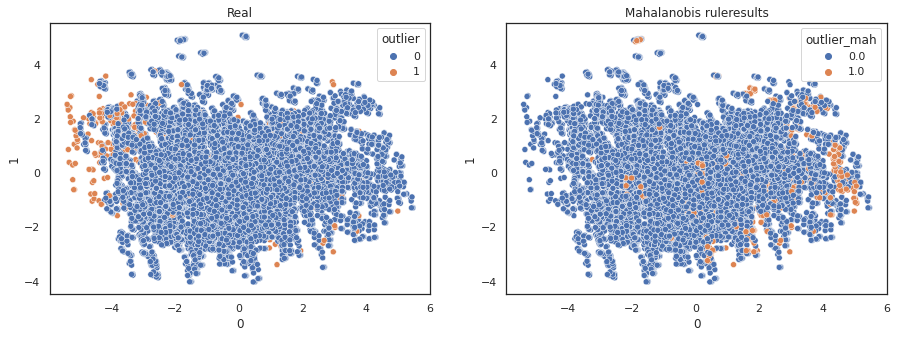

In [54]:
plot_results(y_data, x_reduced, hue_label="outlier_mah", model_name = "Mahalanobis rule")

Ups! I've lowered the threshold to 6 instead of 28, as we can see, it didn't help at all, outliers are considered to be completely different values

# Supervised models

Here we've got some problems with data leakage because of Standard Scaler, but we can ignore them by now. Also I didnt do train-test_split because of poor results on test. So, for training purposes, we can ignore it and just try to get nice results on full dataset

##  SVM

In [70]:
svc = SVC()
svc.fit(x_data, y_data[["outlier"]])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [90]:
predicted_svc = svc.predict(x_data)
predicted_svc_proba = svc.decision_function(x_data)
print(classification_report(y_data[["outlier"]], predicted_svc))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     16550
           1       1.00      0.50      0.67       330

    accuracy                           0.99     16880
   macro avg       1.00      0.75      0.83     16880
weighted avg       0.99      0.99      0.99     16880



In [73]:
fbeta_score(y_data[["outlier"]], predicted_svc, beta=2)

0.5585464333781965

ROC-AUC: 0.981


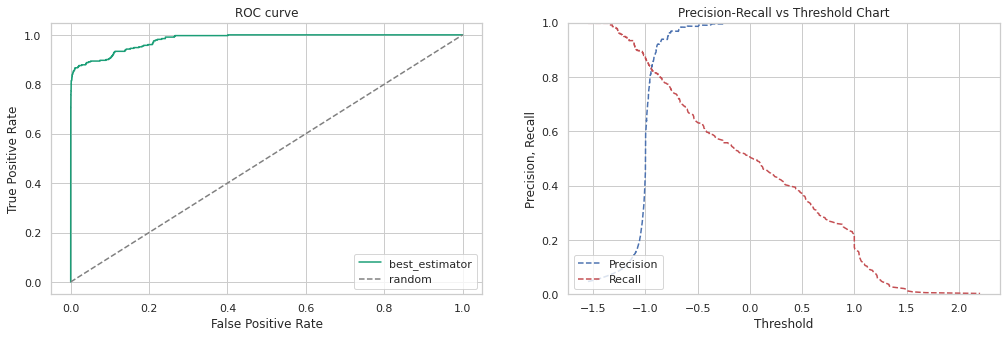

In [78]:
func_roc_auc(predicted_svc_proba, y_data[["outlier"]])

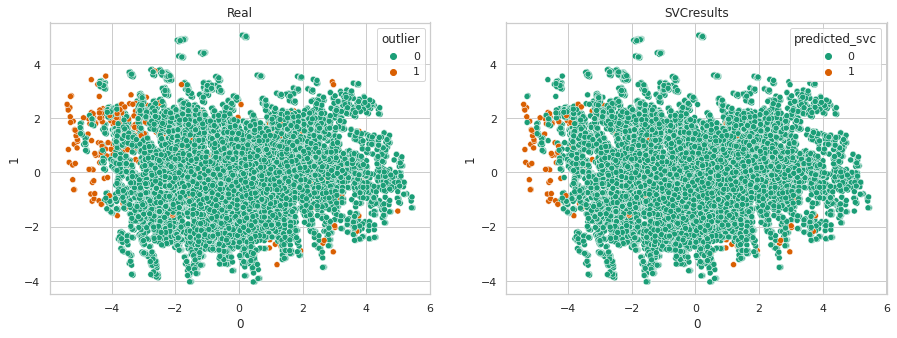

In [91]:
y_data["predicted_svc"] = predicted_svc
plot_results(y_data, x_reduced, hue_label="predicted_svc", model_name = "SVC")

we can assume, that our main purpose is to find all outliers, that we've got, so it seems meaningful to use f2 score here. We've detected only the half of outliers

## Logreg

In [83]:
logreg = LogisticRegression()
logreg.fit(x_data, y_data[["outlier"]])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
predicted_log = logreg.predict(x_data)
predicted_log_proba = logreg.predict_proba(x_data)
print(classification_report(y_data[["outlier"]], predicted_log))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     16550
           1       0.82      0.22      0.34       330

    accuracy                           0.98     16880
   macro avg       0.90      0.61      0.67     16880
weighted avg       0.98      0.98      0.98     16880



In [88]:
fbeta_score(y_data[["outlier"]], predicted_log, beta=2)

0.2523098791755508

ROC-AUC: 0.945


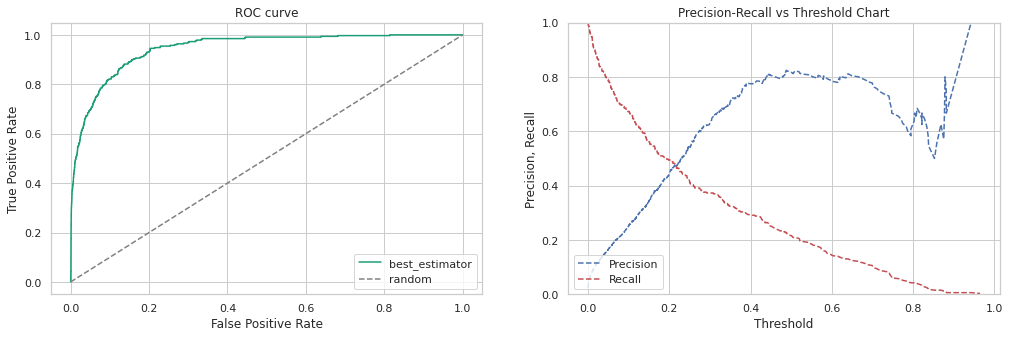

In [89]:
func_roc_auc(predicted_log_proba[:, 1], y_data[["outlier"]])

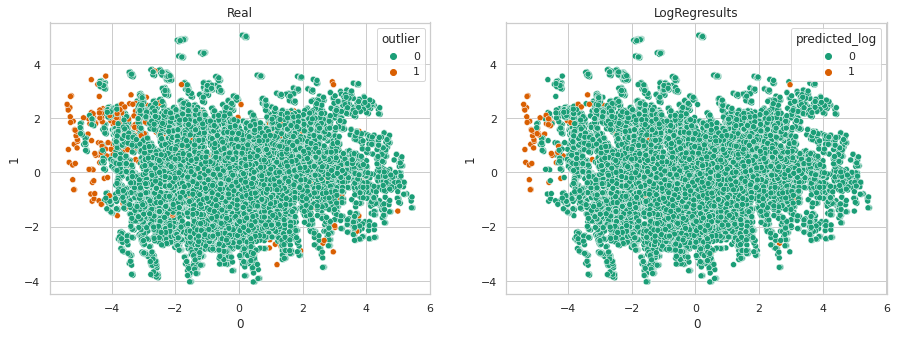

In [92]:
y_data["predicted_log"] = predicted_log
plot_results(y_data, x_reduced, hue_label="predicted_log", model_name = "LogReg")

As we can see here, the results are really poor, recall is equal to 0.22 on the threshold is equal to 0.5. But we can change the threshold to 0.2 and sacrifices the precision in order to get a high recall

## KNN

In [79]:
knnc = KNeighborsClassifier()
knnc.fit(x_data, y_data[["outlier"]])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [80]:
predicted_knnc = knnc.predict(x_data)
predicted_knnc_proba = knnc.predict_proba(x_data)
print(classification_report(y_data[["outlier"]], predicted_knnc))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     16550
           1       1.00      0.65      0.78       330

    accuracy                           0.99     16880
   macro avg       0.99      0.82      0.89     16880
weighted avg       0.99      0.99      0.99     16880



ROC-AUC: 1.0


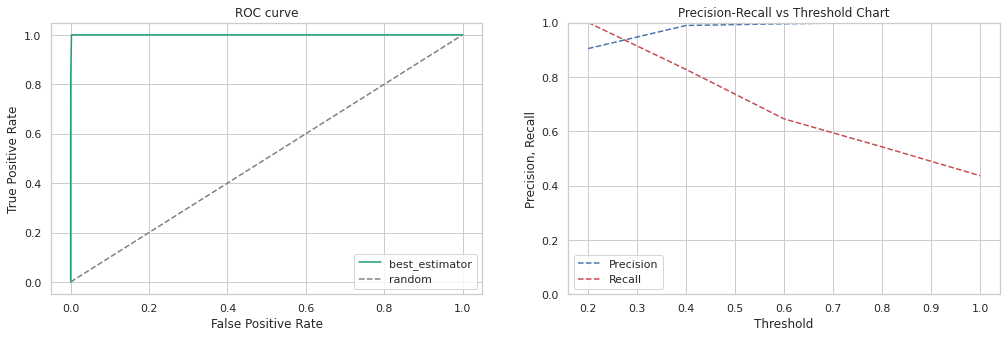

In [81]:
func_roc_auc(predicted_knnc_proba[:, 1], y_data[["outlier"]])

In [82]:
fbeta_score(y_data[["outlier"]], predicted_knnc, beta=2)

0.6942633637548892

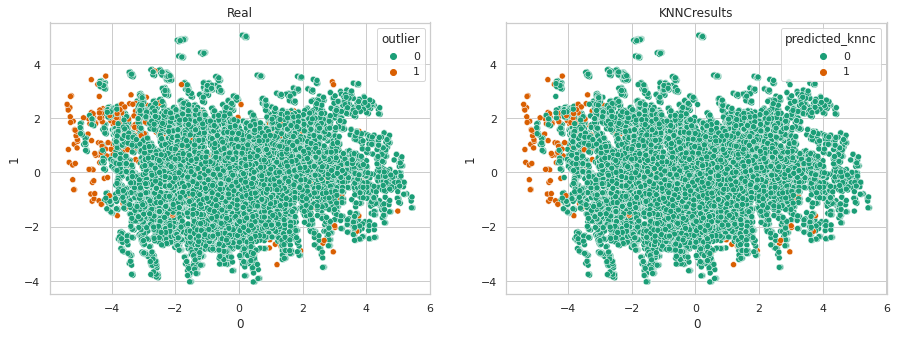

In [93]:
y_data["predicted_knnc"] = predicted_knnc
plot_results(y_data, x_reduced, hue_label="predicted_knnc", model_name = "KNNC")

Among supervised models the best results gave KNN model: ROC_AUC score: 0.969, F2_score: 0.69

on the second place - SVC: ROC_AUC score: 0.98, F2_score: 0.56

on the third - LogReg: ROC_AUC score: 0.95, F2_score: 0.25

# Unsupervised models

## One-class SVM

In [61]:
detector = OneClassSVM(nu=0.5, kernel="rbf")

In [105]:
codense = pdist(x_data, metric='mahalanobis', VI=covariance_inverse)
distance = squareform(codense)

In [ ]:
detector.fit(distance)
svm_predictions = detector.predict(distance)
svm_predictions[svm_predictions != -1] = 0
svm_predictions[svm_predictions == -1] = 1

I wanted to try to use Mahalanobis distance for model fitting like we were doing during the workshop. But it's a too computationally expensive procedure 

In [62]:
detector.fit(x_data)
svm_predictions = detector.predict(x_data)
svm_predictions[svm_predictions != -1] = 0
svm_predictions[svm_predictions == -1] = 1

In [63]:
y_data.loc[:, "svm_predictions"] = svm_predictions
y_data.loc[:, "svm_predictions"] = y_data.loc[:, "svm_predictions"].astype(int)

In [64]:
print(classification_report(y_data["outlier"], y_data["svm_predictions"]))

              precision    recall  f1-score   support

           0       1.00      0.51      0.67     16550
           1       0.04      0.91      0.07       330

    accuracy                           0.52     16880
   macro avg       0.52      0.71      0.37     16880
weighted avg       0.98      0.52      0.66     16880



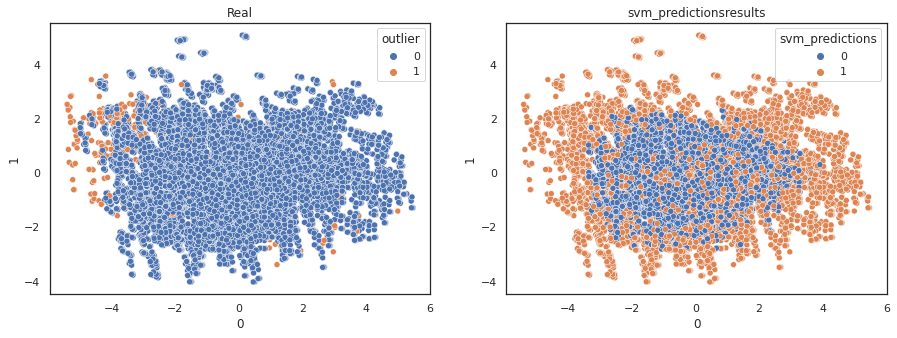

In [65]:
plot_results(y_data, x_reduced, hue_label="svm_predictions", model_name = "svm_predictions")

Comparable results with supervised algorithms should not be expected in that case. SVM is trying to find a circle and enclose normal observations in that circle. But as we can see real outliers are  outliers that lay on the left side of the plane. But we can try to tune it in order to find better results

In [79]:
estimator = OneClassSVM(kernel="rbf")

space = {
    'nu': hp.loguniform('nu', -4*np.log(10), 0*np.log(10)),
    'gamma' : hp.loguniform('gamma', -4*np.log(10), 0*np.log(10)),
    }

trials = Trials()

best = fmin(
    # функция для оптимизации 
    fn=partial(objective_svc, estimator=estimator, x_train=x_data, y_train=y_data),
    # пространство поиска гиперпараметров
    space=space,
    # алгоритм поиска
    algo=tpe.suggest,
    # число итераций
    max_evals=50,
    # куда сохранять историю поиска
    trials=trials,
    # random state
    rstate=np.random.RandomState(1),
    # progressbar
    show_progressbar=True
    )

fbeta_score 0.011 params {'nu': 0.0009082439416453361, 'gamma': 0.0511043520615462}
fbeta_score 0.290 params {'nu': 0.06465170308867146, 'gamma': 0.00017644401322322156}
fbeta_score 0.286 params {'nu': 0.05422877068446778, 'gamma': 0.0021798478461016227}
fbeta_score 0.240 params {'nu': 0.20969885002513, 'gamma': 0.00011318690952651211}
fbeta_score 0.298 params {'nu': 0.06512686414470428, 'gamma': 0.004428860303581814}
fbeta_score 0.203 params {'nu': 0.32414589622109063, 'gamma': 0.002741877411858275}
fbeta_score 0.117 params {'nu': 0.7417596170159586, 'gamma': 0.005319062801094142}
fbeta_score 0.271 params {'nu': 0.03970742395266709, 'gamma': 0.0002437115766432725}
fbeta_score 0.054 params {'nu': 0.0018390003502051283, 'gamma': 0.09026464014427847}
fbeta_score 0.074 params {'nu': 0.006161632773912511, 'gamma': 0.01186334067387705}
fbeta_score 0.048 params {'nu': 0.0002923553521649802, 'gamma': 0.04939722629127307}
fbeta_score 0.223 params {'nu': 0.03851667817573991, 'gamma': 0.02706788

In [80]:
estimator = OneClassSVM(kernel="rbf", nu=0.07, gamma=0.02)

In [81]:
estimator.fit(x_data)
svm_predictions = estimator.predict(x_data)
svm_predictions[svm_predictions != -1] = 0
svm_predictions[svm_predictions == -1] = 1

In [82]:
y_data.loc[:, "svm_predictions"] = svm_predictions
y_data.loc[:, "svm_predictions"] = y_data.loc[:, "svm_predictions"].astype(int)

In [83]:
print(classification_report(y_data["outlier"], y_data["svm_predictions"]))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     16550
           1       0.13      0.48      0.21       330

    accuracy                           0.93     16880
   macro avg       0.56      0.71      0.59     16880
weighted avg       0.97      0.93      0.95     16880



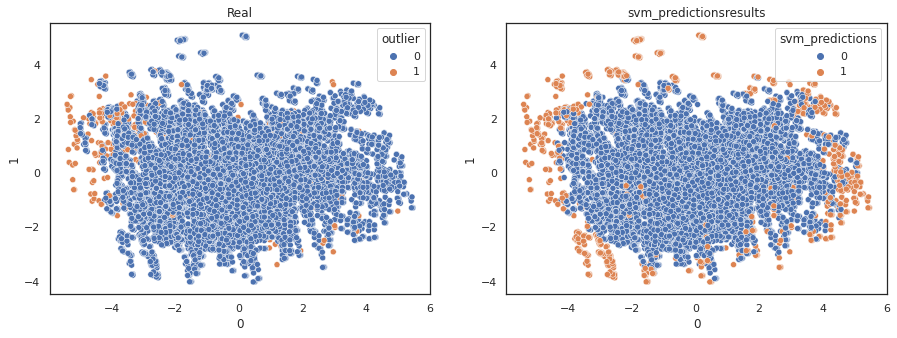

In [84]:
plot_results(y_data, x_reduced, hue_label="svm_predictions", model_name = "svm_predictions")

Nothing surprising. The circle with "normal" objects become bigger, but the problem is still here

## Isolation Forest

In [89]:
iso_forest = IsolationForest()

iso_forest.fit(x_data)
iso_predictions = iso_forest.predict(x_data)
iso_predictions[iso_predictions != -1] = 0
iso_predictions[iso_predictions == -1] = 1

In [90]:
print(classification_report(y_data["outlier"], iso_predictions))

              precision    recall  f1-score   support

           0       0.99      0.63      0.77     16550
           1       0.04      0.81      0.08       330

    accuracy                           0.63     16880
   macro avg       0.52      0.72      0.42     16880
weighted avg       0.98      0.63      0.76     16880



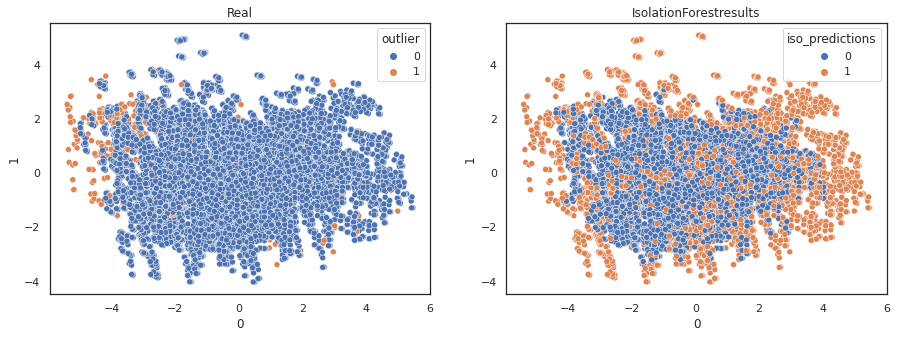

In [91]:
y_data.loc[:, "iso_predictions"] = iso_predictions
plot_results(y_data, x_reduced, hue_label="iso_predictions", model_name = "IsolationForest")

The main problem here is that we've got too many FP results. So we should try to make the results a little bit more conservative

In [93]:
estimator = IsolationForest(random_state=42, behaviour="new", bootstrap=True)

space = {
    'n_estimators': hp.quniform('n_estimators', 100, 500, 1),
    'max_samples': hp.choice('max_samples', [0.4, 0.6, 0.8, 0.9]),
    'contamination' : hp.choice('contamination', [0.01, 0.03, 0.05]),
    }

trials = Trials()

best = fmin(
    # функция для оптимизации 
    fn=partial(objective_isof, estimator=estimator, x_train=x_data, y_train=y_data),
    # пространство поиска гиперпараметров
    space=space,
    # алгоритм поиска
    algo=tpe.suggest,
    # число итераций
    max_evals=50,
    # куда сохранять историю поиска
    trials=trials,
    # random state
    rstate=np.random.RandomState(1),
    # progressbar
    show_progressbar=True
    )

fbeta_score 0.225 params {'n_estimators': 196, 'max_samples': 0.4, 'contamination': 0.05}
fbeta_score 0.209 params {'n_estimators': 381, 'max_samples': 0.6, 'contamination': 0.03}
fbeta_score 0.239 params {'n_estimators': 373, 'max_samples': 0.9, 'contamination': 0.03}
fbeta_score 0.239 params {'n_estimators': 432, 'max_samples': 0.9, 'contamination': 0.03}
fbeta_score 0.248 params {'n_estimators': 381, 'max_samples': 0.8, 'contamination': 0.05}
fbeta_score 0.212 params {'n_estimators': 451, 'max_samples': 0.8, 'contamination': 0.03}
fbeta_score 0.180 params {'n_estimators': 487, 'max_samples': 0.8, 'contamination': 0.01}
fbeta_score 0.231 params {'n_estimators': 360, 'max_samples': 0.6, 'contamination': 0.05}
fbeta_score 0.198 params {'n_estimators': 226, 'max_samples': 0.4, 'contamination': 0.03}
fbeta_score 0.159 params {'n_estimators': 279, 'max_samples': 0.6, 'contamination': 0.01}
fbeta_score 0.198 params {'n_estimators': 147, 'max_samples': 0.4, 'contamination': 0.03}
fbeta_scor

In [94]:
iso_forest = IsolationForest(random_state=42, behaviour="new", bootstrap=True, 
                             n_estimators=408, max_samples=0.9, contamination=0.05)

iso_forest.fit(x_data)
iso_predictions = iso_forest.predict(x_data)
iso_predictions[iso_predictions != -1] = 0
iso_predictions[iso_predictions == -1] = 1

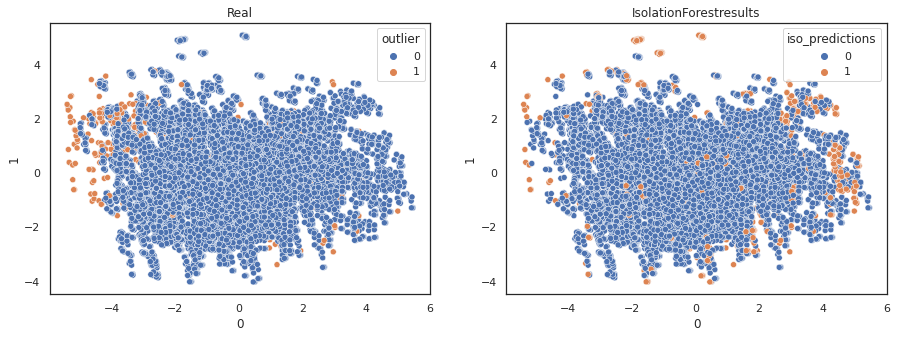

In [95]:
y_data.loc[:, "iso_predictions"] = iso_predictions
plot_results(y_data, x_reduced, hue_label="iso_predictions", model_name = "IsolationForest")

In [96]:
print(classification_report(y_data["outlier"], iso_predictions))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     16550
           1       0.14      0.37      0.21       330

    accuracy                           0.94     16880
   macro avg       0.57      0.66      0.59     16880
weighted avg       0.97      0.94      0.96     16880



Okey, results became a little bit better, but it still far from perfect. But if we will compare them with mahalanobis results, they will be pretty similar

In [103]:
print(classification_report(y_data["iso_predictions"], y_data["outlier_mah"]))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     16036
           1       0.53      0.60      0.57       844

    accuracy                           0.95     16880
   macro avg       0.76      0.79      0.77     16880
weighted avg       0.96      0.95      0.95     16880



I consider it means, that the labels of the first class are not outliers by their nature, they are just objects from rare class, which is closer to the zero class than real outliers. But it all depends on what we call outliers.